# **Speed Dating with Tinder**




# Introduction

###Imports des libairies et du dataset

In [2]:
#Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px



In [3]:
#Pour connecter le notebook à Google Drive et lire directement le dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#Lecture du dataset
data = pd.read_csv("/content/drive/MyDrive/Speed+Dating+Data.csv", encoding='ISO-8859-1')
# Alternative
#data = pd.read_csv("/content/Speed+Dating+Data.csv", encoding='ISO-8859-1')

 # 1 - Présentation du dataset

###Description

In [ ]:
# Afficher les premières lignes du  dataset
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informations générales du dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB
None


In [ ]:
# Statistiques descriptives
data.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
# Colonnes
pd.set_option('display.max_seq_items', None)
data.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

###Valeurs manquantes

In [ ]:
# Valeurs manquantes par colonnes en pourcentage
missing_values = data.isna().mean().sort_values(ascending=False) * 100
print(missing_values.to_string())

num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
shar7_2     76.438291
attr7_2     76.318931
intel7_2    76.318931
fun7_2      76.318931
amb5_3      75.936978
attr7_3     75.936978
sinc7_3     75.936978
intel7_3    75.936978
fun7_3      75.936978
amb7_3      75.936978
shar7_3     75.936978
shar2_3     75.936978
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
attr4_3     64.681308
sinc4_3     64.681308
intel4_3    64.681308
fun4_3      64.681308
amb4_3      64.681308
shar4_3     64.681308
attr2_3     64.681308
sinc2_3     64.681308
fun2_3      64.681308
intel2_3    64.681308
amb2_3      64.681308
mn_sat      62.604440
tuition     57.233230
you_call    52.566245
shar1_3     52.566245
date_3      52.566245
attr1_3     52.566245
sinc1_3     52.566245
intel1_3    52.566245
fun1_3      52.566245
amb1_3      52.566245
attr3_3     52.566245
sinc3_3     52.566245
intel3_3    52.566245
fun3_3    

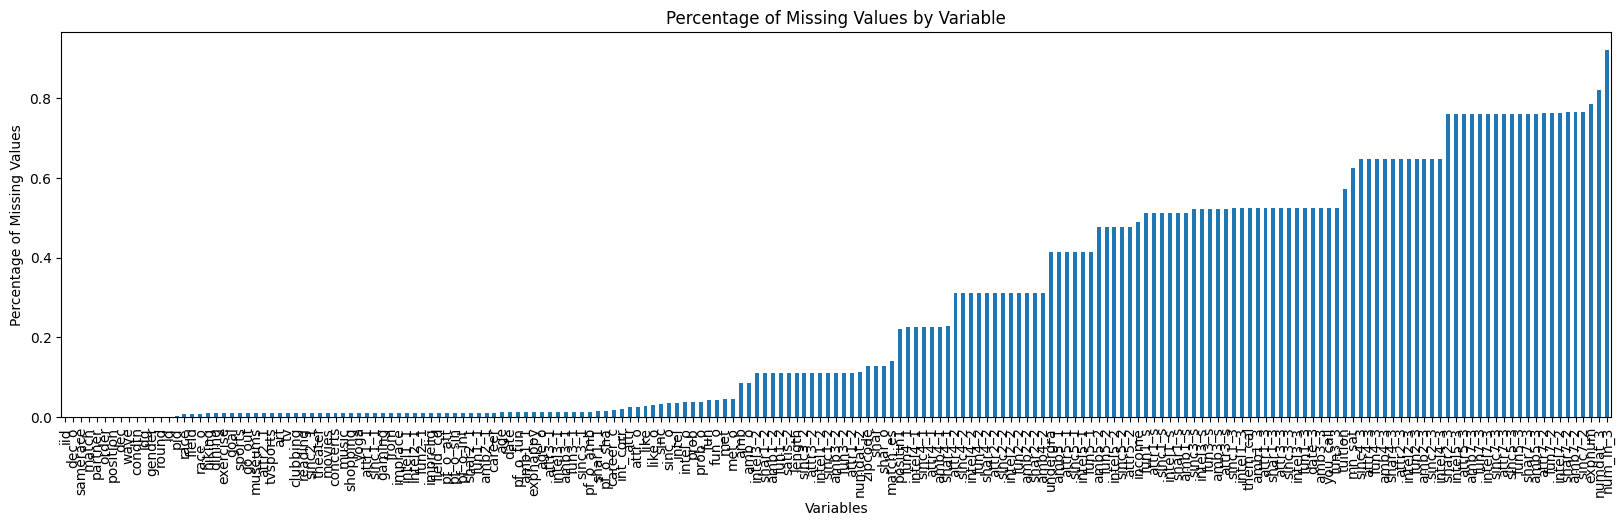

In [ ]:
# Visualisation des valeurs manquantes
data.isna().mean().sort_values().plot(kind="bar", figsize=(20, 5), title="Percentage of Missing Values by Variable")
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show()

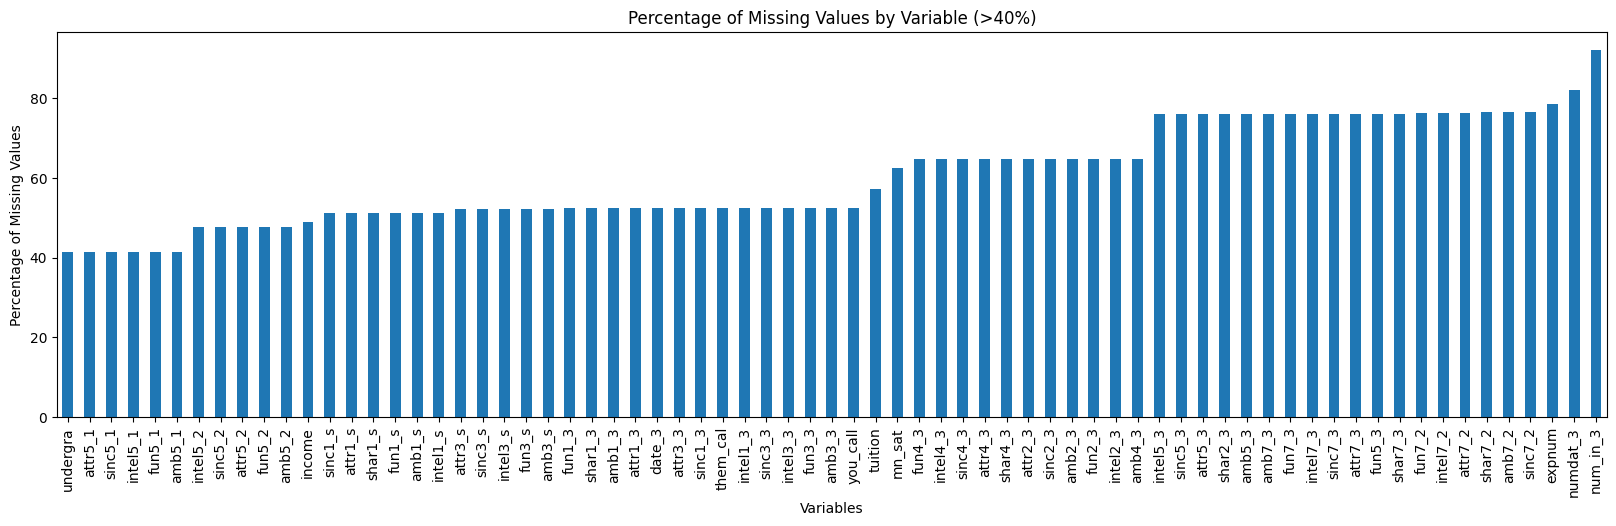

In [ ]:
#Visualisation pour les colonnes avec le plus de valeurs manquantes (sup à 40%)

missing_percentage = data.isna().mean() * 100

# Variables avec 40% de valeurs manquantes
filtered_missing_percentage = missing_percentage[missing_percentage > 40].sort_values()

# Afficher les variables
filtered_missing_percentage.plot(kind="bar", figsize=(20, 5), title="Percentage of Missing Values by Variable (>40%)")
plt.xlabel("Variables")
plt.ylabel("Percentage of Missing Values")
plt.show()

In [ ]:
# Pourcentage de valeurs manquantes
total_values_count = data.shape[0]*data.shape[1]
missing_values_count = data.isnull().values.sum()
print(f"There are {total_values_count} values and {missing_values_count} missing values, so {round(missing_values_count/total_values_count*100)}%")


There are 1633710 values and 432016 missing values, so 26%


In [8]:
# Vérification pour les id, iid et pid
missing_id = data['id'].isnull().value_counts()
missing_iid = data['iid'].isnull().value_counts()
missing_pid = data['pid'].isnull().value_counts()
print(missing_id)
print(missing_iid)
print(missing_pid)

False    8377
True        1
Name: id, dtype: int64
False    8378
Name: iid, dtype: int64
False    8368
True       10
Name: pid, dtype: int64


In [9]:
# Elimination des données manquantes pour idd et pid
data.dropna(subset=['pid','id'], inplace=True)

###Organisation des dates

In [ ]:
# Nombre de participants
num_unique_participants = data.iid.nunique()
print(f"There are {num_unique_participants} unique participants in the dataset.")

There are 551 unique participants in the dataset.


In [ ]:
# Nombre de dates
data_waves = data.iid.value_counts().mean()
print(f"There are {data_waves} dates by particpant")

There are 15.185117967332124 dates by particpant


In [ ]:
# Déterminer le nombre de waves
num_waves = data['wave'].nunique()
print(f"There are {num_waves} waves in the dataset.")

There are 21 waves in the dataset.


- Notre dataset contient  **8378 lignes** (pour 8378 dates) et **195 colonnes**. On constate qu'un participant peut apparaître plusieurs fois dans la colonne 'iid'.


- Notre dataset contient de nombreuses colonnes ainsi que de nombreuses lignes avec des **valeurs NaN** (26% de valeurs manquantes).

Cependant on peut expliquer la présence de ces NaNs par l'**absence de match** de second date (certaines valeurs ne sont présentes que si un second a eu lieu).

Ces valeurs manquantes peuvent également être dues au moment tardif de **remplissage des questionnaires** après les dates.


- Enfin concernant on constate **551 participants** pour 8378 dates au total **répartis en 21 vagues**, soit en moyenne **15 dates** par participant.

# 2 - Profil des participants

###Genre

In [10]:
# Mapping pour le genre
gender_mapping = {0: 'Female', 1: 'Male'}

data['gender'] = data['gender'].map(gender_mapping)


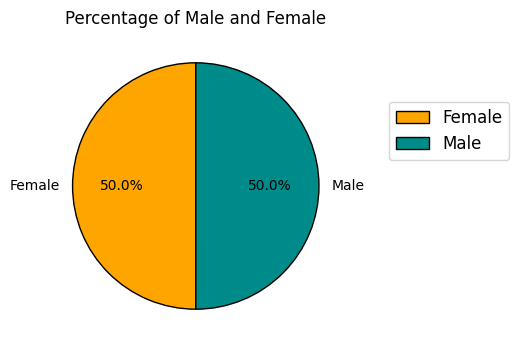

In [11]:
# Distribution des genres
df_gender = data.groupby(by=['iid']).mean(numeric_only = True)
df_pie = data['gender'].value_counts()

# Diagramme
plt.figure(figsize=(4, 4))
plt.pie(df_pie.values, labels=df_pie.index,
        colors=['orange','darkcyan'],
        startangle=90,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 10})

plt.title('Percentage of Male and Female', fontsize=12)
plt.legend(bbox_to_anchor=(1.1, 0.8), fontsize=12)
plt.show()

- La répartition entre hommes et femmes est parfaitement respectée.


###Âge

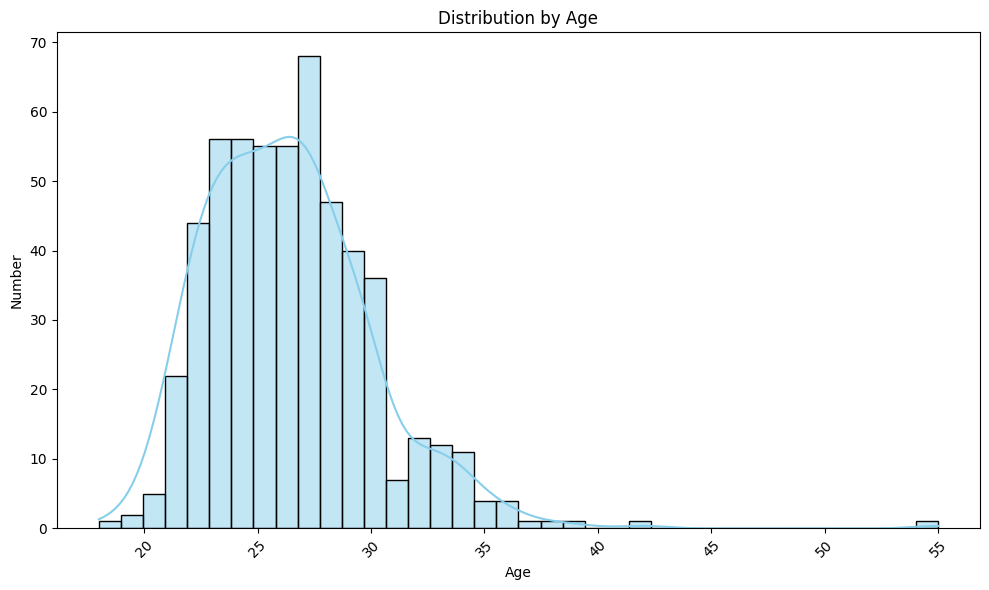

In [ ]:
# Distribution de l'âge
unique_ages = data.drop_duplicates('iid')['age']
age_counts = unique_ages.value_counts().sort_index()

# Graphique
plt.figure(figsize=(10, 6))
sns.histplot(data=unique_ages, kde=True, color='skyblue')
plt.title('Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

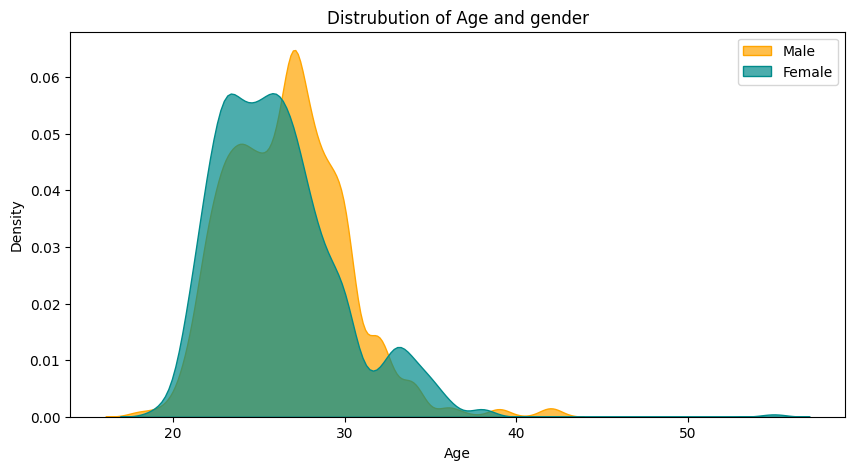

In [ ]:
# Distribution du genre par age
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data, x='age', hue='gender', fill=True, palette={'Male': 'orange', 'Female': 'darkcyan'}, alpha=0.7),
plt.title("Distrubution of Age and gender")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(['Male', 'Female'])
plt.show()


- La distribution de l'âge **s'étend entre 18 ans et 55 ans**,la majorité des **participants ont entre 20 et 37 ans** avec une **plus grande densité entre 21 et 31 ans**.
- Concernant la densité de l'âge par genre on observe que les deux distributions sont multimodales avec plusieurs pics,
- On constate sur la distribution que **les femmes sont en majorité plus jeunes que les hommes** malgrés un pic de la distribution des femmes à 32 ans.

###Objectifs

In [ ]:
# Mapping des objectifs du speed dating
goal_mapping = {
    1: 'Fun night out',
    2: 'Meet new people',
    3: 'Get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}
data['goal_mapped'] = data['goal'].map(goal_mapping)

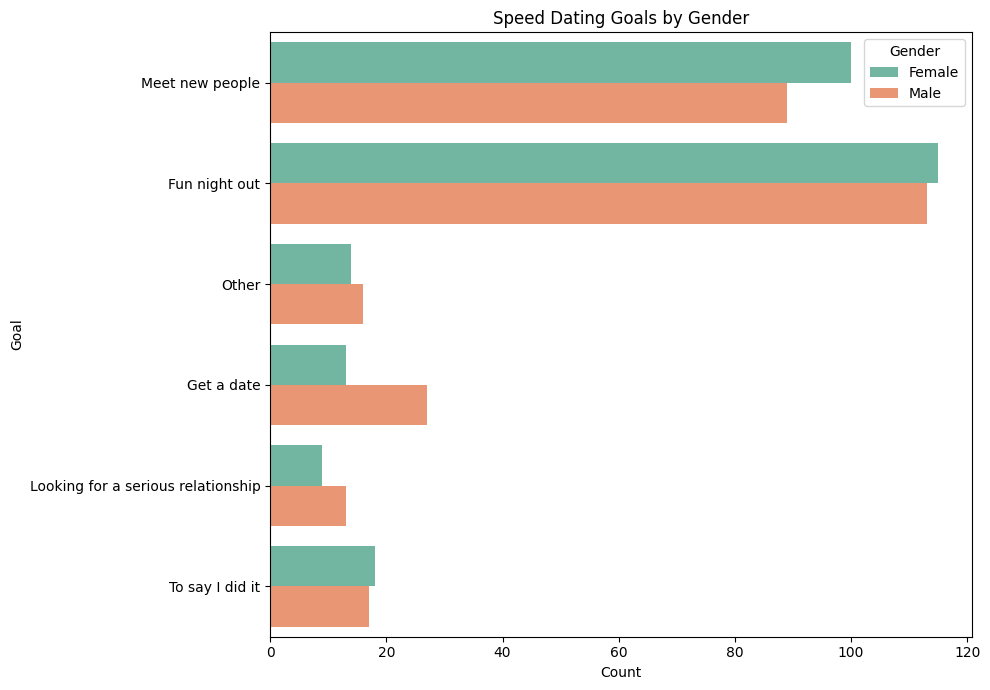

In [ ]:
# Objectifs du speed dating par genre
unique_iid_data = data.drop_duplicates(subset=['iid'])

plt.figure(figsize=(10, 7))
sns.countplot(y='goal_mapped', hue='gender', data=unique_iid_data, palette='Set2')
plt.title('Speed Dating Goals by Gender')
plt.xlabel('Count')
plt.ylabel('Goal')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- Une majorité de participant a pour objtectif de **rencontrer de nouvelles personnes ou de s'amuser**.
- Le hommes appportent plus d'importance au fait d'aller en date que les femmes.
- Bien que ce soit l'objtectif de peu de participants on constate que **les hommes sont plus enclins à trouver une relation sérieuse** lors de ces dates.

###Ethnie

In [ ]:
# Mapping pour l'ethnie
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

data['race'] = data['race'].map(race_mapping)

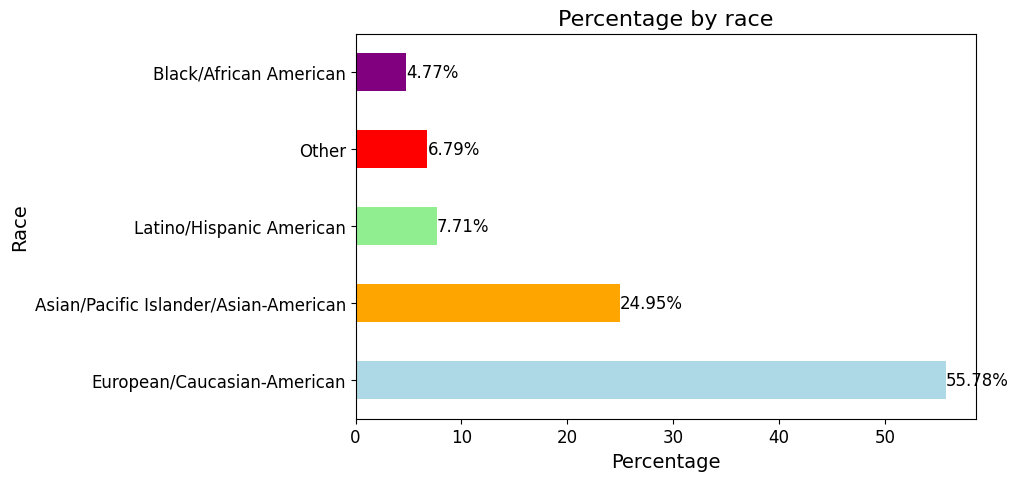

In [ ]:
# Pourcentage de participants par ethnie
unique_data = data.drop_duplicates(subset=['iid'])
race_percentages = unique_data['race'].value_counts(normalize=True) * 100

# visualisation
colors = ['lightblue', 'orange', 'lightgreen', 'red', 'purple', 'brown']

plt.figure(figsize=(8, 5))
race_percentages.plot(kind='barh', color=colors)

for index, value in enumerate(race_percentages):
    plt.text(value, index, f'{value:.2f}%', fontsize=12, va='center')

plt.title('Percentage by race', fontsize=16)
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
# Diagramme de la réparatition des ethnies en fonction du genre
unique_data = data.drop_duplicates(subset=['iid'])

# Supression des NaNs dans race
data_cleaned = unique_data.dropna(subset=['race'])

fig = px.sunburst(data_cleaned, path=['race', 'gender'], color='race')
fig.update_layout(title="Distribution of Race By Gender", title_font_size=25)
fig.update_traces(textinfo='label+percent entry')

fig.show()

- On a **plus de la moitié des participant  (56 %)** qui sont **d'ethnie caucasienne**(européen /Américain), suivie par environs **(25%)** de participants d'ethnie **asiaque /pacifique** et par **8% d'hispanique/latin** et **5% d'Africain/ black americain** et on petite propotion "d'autres" ethnies.
- Parmis les ethnies **la proportion entre hommes et femmes** est plutôt **bien équilibrée** mais on remarque 4% de femmes en moins chez les caucasiens et 2% d'hommes en moins chez les hispaniques.

###Centres d'intérêt

In [ ]:
# Rassembler certaines activités/ intérets en catégories

categories = {
    'Sports': ['sports', 'exercise', 'hiking', 'yoga'],
    'Tv_sport':['tvsports'],
    'Art': ['museums', 'art'],
    'Music' :['concerts', 'music'],
    'Reading': ['reading'],
    'Entertainment_home': ['tv', 'movies', 'gaming'],
    'Entertainment_social': ['dining', 'clubbing'],
    'Shopping': ['shopping']
}

<ipython-input-302-c1afadf5c469>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




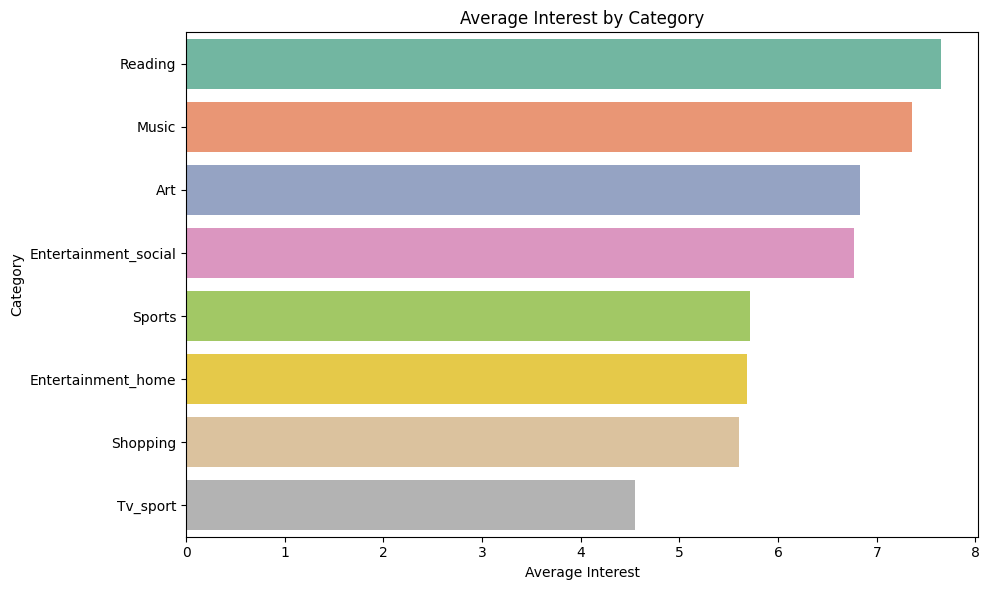

In [ ]:
# Intérets par catégories
unique_data = data.drop_duplicates(subset=['iid'])

# Calcul des moyennes pour chaque catégorie
category_means = {}
for category, cols in categories.items():
    category_means[category] = unique_data[cols].mean(axis=1).mean()

category_means_df = pd.DataFrame(list(category_means.items()), columns=['Category', 'Average Interest'])
category_means_df_sorted = category_means_df.sort_values(by='Average Interest', ascending=False)

# Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Interest', y='Category', data=category_means_df_sorted, palette='Set2')
plt.title('Average Interest by Category')
plt.xlabel('Average Interest')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

- Nous avons regroupé certains centres d'intérêt par catégorie.
- **Les activités culturelles** comme la lecture, la musique et l'art sont les plus plebiscitée, **les activités sociales** semblent également importantes.
- A l'inverse **regarder le sport à la télé** attirent moins d'intérêt.

In [ ]:
unique_origins = data.drop_duplicates(subset=['iid'])['from'].value_counts()
print(unique_origins)

New York             36
New Jersey           24
California           21
China                 8
Boston                8
                     ..
Cameroon              1
Bulgaria              1
Alabama               1
Russia/Germany        1
London & New York     1
Name: from, Length: 269, dtype: int64


### Ville, région ou pays d'origine

In [ ]:
# Mapping des villes à regrouper
city_mapping = {
    'New York': ['New York', 'New York City', 'NYC', 'Brooklyn, NY', 'Manhattan', 'Staten Island', 'Hastings-on-Hudson, NY'],
    'New Jersey': ['New Jersey', 'NJ'],
    'Boston': ['Boston', 'Boston, MA'],
    'California': ['California', 'San Diego', 'california', 'Palm Springs, California', 'Los Angeles', 'San Francisco'],
    'Florida': ['Florida', 'Miami'],
    'Texas': ['Texas', 'Houston'],
    'UK': ['UK/Turkey', 'London, England'],
    'Italy': ['Italy', 'Genova, Italy'],
    'Connecticut': ['Connecticut', 'CT'],
    'Michigan': ['Michigan', 'Ann Arbor, MI'],
    'Minnesota': ['Minnesota', 'Minneapolis, MN'],

}

for new_city, old_cities in city_mapping.items():
    data['from'] = data['from'].replace(old_cities, new_city)

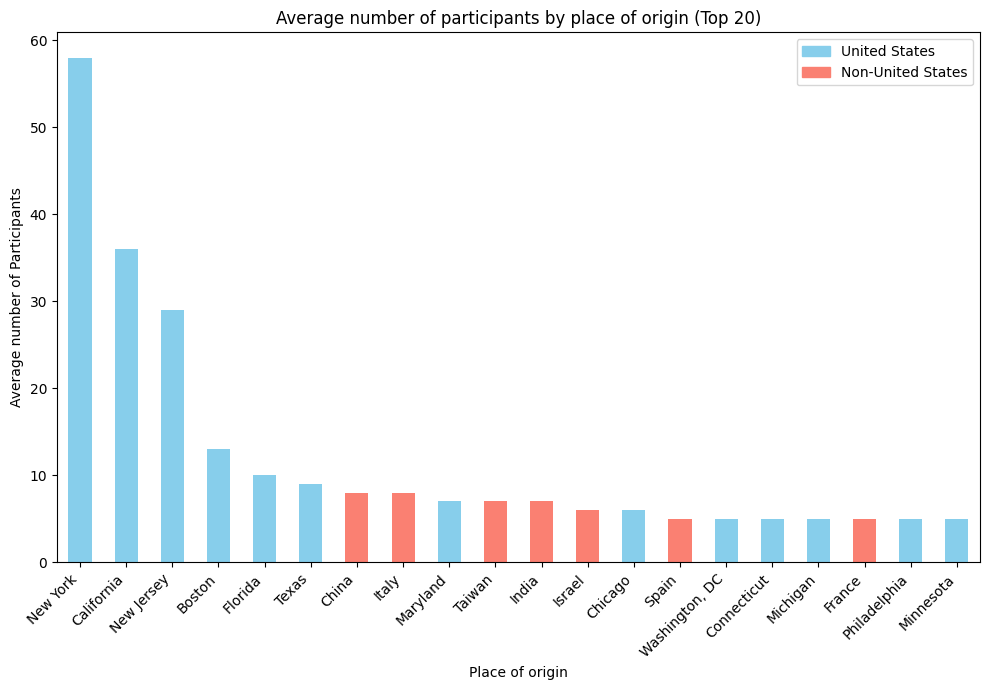

In [ ]:
# D'où viennent les candidats
# Fonction qui définit si les candidats sont américains ou pas
def is_us_city(city):
    us_cities = ['New York', 'New Jersey', 'California', 'Boston', 'Texas', 'Maryland', 'NYC', 'Chicago', 'Miami', 'Florida',
                 'Connecticut', 'Boston, MA', 'Philadelphia', 'Los Angeles', 'NJ', 'Washington, DC', 'San Francisco', 'Michigan', 'Minnesota',]
    return city in us_cities


data['is_us'] = data['from'].apply(is_us_city)
average_origin = data.groupby(['from', 'is_us'])['iid'].nunique().sort_values(ascending=False).head(20)

# Graphique
plt.figure(figsize=(10, 7))
colors = ['skyblue' if is_us else 'salmon' for _, is_us in average_origin.index]
average_origin.index = average_origin.index.droplevel(1)
average_origin.plot(kind='bar', color=colors)
plt.title('Average number of participants by place of origin (Top 20)')
plt.xlabel('Place of origin')
plt.ylabel('Average number of Participants')
plt.xticks(rotation=45, ha='right')

# Légende
us_patch = mpatches.Patch(color='skyblue', label='United States')
non_us_patch = mpatches.Patch(color='salmon', label='Non-United States')
plt.legend(handles=[us_patch, non_us_patch])

plt.tight_layout()
plt.show()


- Les origines étant très diverses nous allons réprésenter les 20 premières seulement; nous avons regroupé certaines valeurs en catégories pour éviter d'avoir plusieurs colonnes pour New-York par exemple.
- La majorité des participants viennent de **New-York** ou de **Californie**.
- La plupart sont américains mais on observe des provenances d'autres pays européens et asiatiques.

###Domaine d'étude

In [ ]:
unique_fields = data['field'].unique()
print(unique_fields)
field_counts = data['field'].value_counts()
print(field_counts)

['Law' 'law' 'Economics' 'Masters in Public Administration'
 'Masters of Social Work&Education' 'Finance' 'Business'
 'political science' 'money' 'Operations Research' 'TC (Health Ed)'
 'Psychology' 'social work' 'Social Work' 'Speech Language Pathology'
 'Speech Languahe Pathology' 'Educational Psychology'
 'Applied Maths/Econs' 'Mathematics' 'Statistics'
 'Organizational Psychology' 'Mechanical Engineering' 'Finanace'
 'Finance&Economics' 'Undergrad - GS' 'Mathematical Finance' 'Medicine'
 'MBA' 'LAW' nan 'psychology' 'German Literature'
 'Business & International Affairs' 'MFA Creative Writing' 'Engineering'
 'Electrical Engineering' 'Classics' 'Operations Research (SEAS)'
 'chemistry' 'Journalism' 'Elementary/Childhood Education (MA)'
 'microbiology' 'Masters of Social Work' 'Communications' 'Marketing'
 'Chemistry' 'International Educational Development'
 'Education Administration' 'Business (MBA)' 'Computer Science'
 'Climate-Earth and Environ. Science' 'financial math' 'Business

In [ ]:
 #Répartition des domaines d'étude en tenant compte de l'ID unique de chaque participant
unique_study = data.groupby('iid')['field'].first().value_counts().sort_values(ascending=False).head(20)

unique_study

MBA                       35
Business                  35
Law                       33
Social Work               24
International Affairs     15
Electrical Engineering    10
law                       10
Psychology                 9
Finance                    9
Biology                    6
Engineering                6
business                   6
Film                       5
Economics                  5
Sociology                  5
Mathematics                5
Biochemistry               4
Clinical Psychology        4
School Psychology          4
Urban Planning             4
Name: field, dtype: int64

In [ ]:
# Mapping des domaines similaires
domaine_categories = {
    'MBA': 'Business',
    'Business': 'Business',
    'Law': 'Law',
    'Social Work': 'Social Sciences',
    'International Affairs': 'Social Sciences',
    'Electrical Engineering': 'Engineering',
    'law': 'Law',
    'Psychology': 'Psychology',
    'Finance': 'Business',
    'Biology': 'Science',
    'Engineering': 'Engineering',
    'business': 'Business',
    'Film': 'Arts',
    'Economics': 'Social Sciences',
    'Sociology': 'Social Sciences',
    'Mathematics': 'Science',
    'Biochemistry': 'Science',
    'Clinical Psychology': 'Psychology',
    'School Psychology': 'Psychology',
    'Urban Planning': 'Social Sciences'
}

data['field_category'] = data['field'].map(domaine_categories)

category_counts = data['field_category'].value_counts().sort_values(ascending=False)

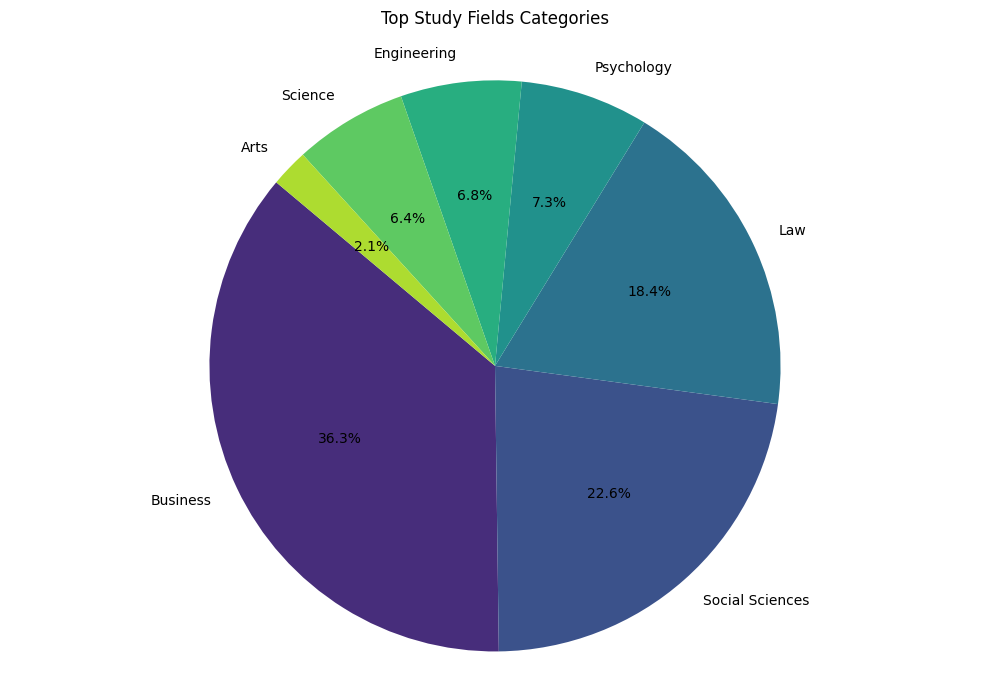

In [ ]:
# Catégories d'études les plus représentées
data['field_category'] = data.groupby('iid')['field'].transform(lambda x: x.map(domaine_categories))
unique_participants = data.drop_duplicates(subset='iid')
category_counts = unique_participants['field_category'].value_counts().sort_values(ascending=False)

# Visualisation

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_counts)))
ax.set_title('Top Study Fields Categories', pad=20)
ax.axis('equal')
plt.tight_layout()
plt.show()



- De même on observe de nombreux domaines d'études, on a choisis les 20 premiers et on a décidé de les regrouper en catégories.
- **Le business/la finance** représente plus d'un tiers des participants (36%) suivit des sciences sociales et du droit.

###Carrière (envisagée)


In [ ]:
# Mapping des carrières
career_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Consulting/Finance/Marketing/Business/CEO/',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

def map_career(career_code):
    return career_mapping.get(career_code, 'Unknown')

In [ ]:
# Carrière envisagée en fonction du genre
male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

# iid hommes et femmes
male_career_counts = male_data.drop_duplicates(subset=['iid'])['career_c'].map(career_mapping).value_counts()
female_career_counts = female_data.drop_duplicates(subset=['iid'])['career_c'].map(career_mapping).value_counts()


df_male = pd.DataFrame({'Career': male_career_counts.index, 'Count': male_career_counts.values, 'Gender': 'Male'})
df_female = pd.DataFrame({'Career': female_career_counts.index, 'Count': female_career_counts.values, 'Gender': 'Female'})

df = pd.concat([df_male, df_female])

# Visualisation
fig = px.bar(df, x='Count', y='Career', color='Gender', orientation='h',
             title='Career and gender',
             labels={'Count': 'Individuals', 'Career': 'Career'},
             color_discrete_sequence=['Orange', 'darkcyan'])
fig.update_layout(plot_bgcolor='white')
fig.show()

- Tout comme pour les études le **domaine du business et de la finance** est sur réprésenté, il compte une **majorité d'homme**.
- Une majorité de participant envisage également une carrière **académique** ou dans **la recherche** avec un bon équilibre hommes/femmes.
- Certaines aspirations sont **essentiellement féminines (travail social ou journalisme** par exemple) **ou masculines (achitecture, sport et immobilier)**.


### Les revenus

<ipython-input-12-3dcb79c1b8fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomes['income'] = incomes['income'].str.replace(',', '').astype(float)


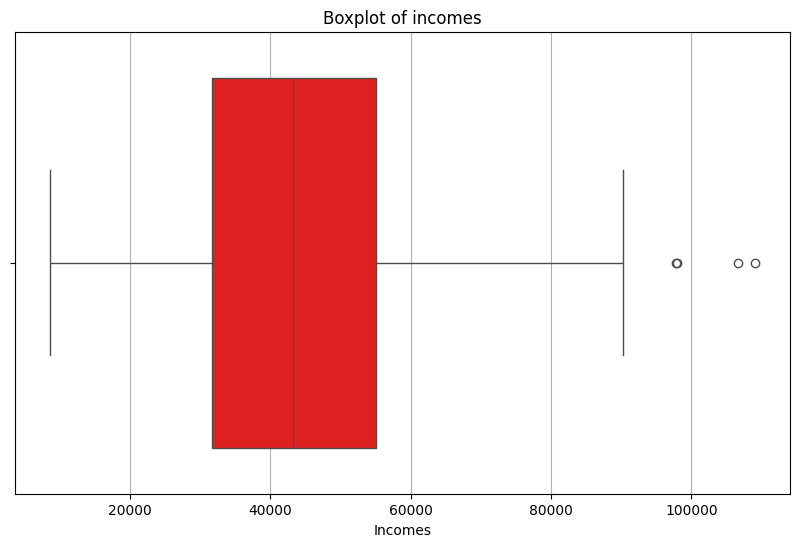

In [12]:
# Revenus
incomes = data[['iid', 'income']]
incomes['income'] = incomes['income'].str.replace(',', '').astype(float)

cleaned_incomes = incomes.dropna(subset=['income'])
unique_incomes = cleaned_incomes.drop_duplicates(subset='iid')

plt.figure(figsize=(10, 6))
sns.boxplot(x=unique_incomes['income'], color='red', orient='h')
plt.title('Boxplot of incomes')
plt.xlabel('Incomes')
plt.grid(True, axis='x')
plt.show()

In [ ]:
# Calcul de la médiane des revenus pour l'ensemble des données
median_income = unique_incomes['income'].median()
print(median_income)

43185.0


- Les participant ont **des revenus médians situés autour de 43 000** dollars. L'ensemble de la distribution, hors outliers, semble se situer entre un peu moins de 20 000 et environ 70 000 dollars.
- On observe des valeurs extrêmes autour des 100 000 dollars, l'âge maximum étant assez élevé et l'étude prenant lieu aux USA ces salaires bien que très supérieurs à la moyenne des participants sont tout à fait envisageables.

# 2 - Comment obtenir un second date


In [15]:
# Qui a eu un second date
second_matches = data[data['match'] == 1]
nombre_de_personnes = second_matches['iid'].nunique()

print("Number of participants with a match :", nombre_de_personnes)

Number of participants with a match : 452


In [16]:
# Genre des participant avec un second rendez vous
second_matches = data[data['match'] == 1]

unique_iids_second_matches = second_matches['iid'].unique()
gender_data = data.drop_duplicates(subset=['iid'])[['iid', 'gender']]
gender_data_second_matches = gender_data[gender_data['iid'].isin(unique_iids_second_matches)]
gender_counts_second_matches = gender_data_second_matches['gender'].str.lower().value_counts()

print("Nombre de femmes avec un second rendez-vous :", gender_counts_second_matches['female'])
print("Nombre d'hommes avec un second rendez-vous :", gender_counts_second_matches['male'])


Nombre de femmes avec un second rendez-vous : 221
Nombre d'hommes avec un second rendez-vous : 231


In [17]:
# Nombre de participant avec plus de 5 matchs positifs

matches_count = second_matches.groupby('iid').size().reset_index(name='matches_count')

iid_most_matches = matches_count[matches_count['matches_count'] > 5]
count_most_matches = len(iid_most_matches)

print("Participants with more than 5 matches:", count_most_matches)

Participants with more than 5 matches: 62


In [18]:
# Filtrer les IID uniques avec plus de 5 rendez-vous
iid_most_matches = matches_count[matches_count['matches_count'] > 5]

gender_data_most_matches = gender_data[gender_data['iid'].isin(iid_most_matches['iid'])]
gender_counts_most_matches = gender_data_most_matches['gender'].str.lower().value_counts()

print("Nombre de femmes avec plus de 5 rendez-vous :", gender_counts_most_matches['female'])
print("Nombre d'hommes avec plus de 5 rendez-vous :", gender_counts_most_matches['male'])


Nombre de femmes avec plus de 5 rendez-vous : 34
Nombre d'hommes avec plus de 5 rendez-vous : 28


In [21]:
# Création d'un colonne pour les partcipants avec le plus de matches pour la suite
matches_count = second_matches.groupby('iid').size().reset_index(name='matches_count')
iid_most_matches = matches_count[matches_count['matches_count'] > 5]
unique_iids_more_than_5_matches = iid_most_matches['iid'].unique()

# Créer une nouvelle colonne pour marquer les participants avec plus de 5 matches positifs
data['more_than_5_matches'] = data['iid'].isin(unique_iids_more_than_5_matches).astype(int)


In [20]:
# Vérification compter iids uniques
unique_iid_count_more_than_5_matches = len(data[data['more_than_5_matches'] == 1]['iid'].unique())

print("Nombre d'iids uniques avec plus de 5 matches :", unique_iid_count_more_than_5_matches)


Nombre d'iids uniques avec plus de 5 matches : 62


- On a **452 participants qui ont obtenus un second date** donc une majorité.
- Parmis eu **62 personnes ont obtenus plus de 5 matchs** soit environs **14%** de l'ensemble des personne avec matchs positifs et 11% de l'ensemble du dataset.

- Nous allons essayer de voir par la suite ce qui fait que ces 11% de participants aient obtenus plus de matchs que les autres. Parmis ces 11 participants il y'a légèrement plus de femmes que d'hommes (6 de plus) soit un peu plus de **9% de femmes en plus.**

### Similarités et différences

In [ ]:
# Corrélation entre "le même âge" et un second date

# Déterminer si les participants sont dans la même tranche d'âge
age_diff = abs(data['age'] - data['age_o'])
age_threshold = 3  # la tranche d'âge
data['same_age_range'] = age_diff <= age_threshold

# Analyser la corrélation entre 'same_age_range' et 'match'
correlation = data[['same_age_range', 'match']].corr()

print(correlation)

                same_age_range    match
same_age_range         1.00000  0.05454
match                  0.05454  1.00000


<ipython-input-321-0127ded84445>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




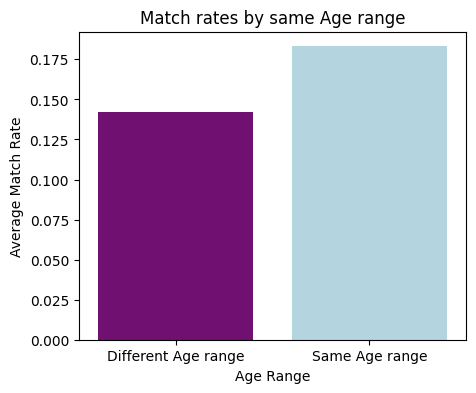

In [ ]:
# Obtention d'un second match selon la similarité de la tranche d'âge

# Moyenne d'âge par tranches d'âge similaires
match_rates = data.groupby('same_age_range')['match'].mean().reset_index()

# Illustration
plt.figure(figsize=(5, 4))
sns.barplot(x='same_age_range', y='match', data=match_rates, palette=['purple', 'lightblue'])
plt.title('Match rates by same Age range')
plt.xlabel('Age Range')
plt.ylabel('Average Match Rate')
plt.xticks([0, 1], ['Different Age range', 'Same Age range'])
plt.show()


In [ ]:
# Calculer la corrélation entre la même ethnie et un second date
correlation = data[['samerace', 'match']].corr()

print(correlation)

          samerace     match
samerace  1.000000  0.012562
match     0.012562  1.000000


<ipython-input-323-2403fe49da5a>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




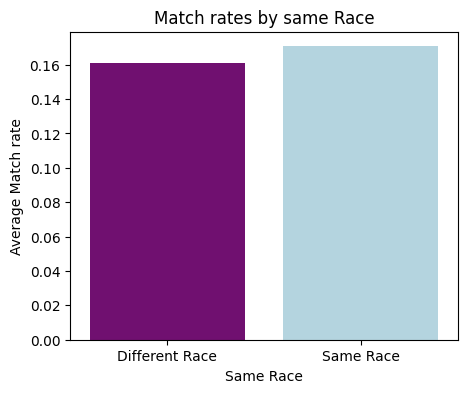

In [ ]:
# Obtention d'un second match selon la similarité de l'ethnie

# moyennes de match pour les mêmes ethnie et différentes ethnies
match_rates = data.groupby('samerace')['match'].mean().reset_index()

# Illustration
plt.figure(figsize=(5, 4))
sns.barplot(x='samerace', y='match', data=match_rates, palette =['purple', 'lightblue'])
plt.title('Match rates by same Race')
plt.xlabel('Same Race')
plt.ylabel('Average Match rate')
plt.xticks([0, 1], ['Different Race', 'Same Race'])
plt.show()

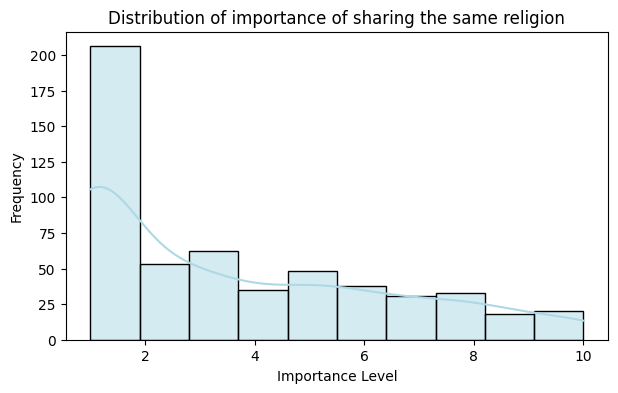

In [ ]:
# Distribution de l'importance d'avoir la même religion pour les participants
unique_iid = data.drop_duplicates(subset=['iid'])

plt.figure(figsize=(7, 4))
sns.histplot(unique_iid['imprelig'], bins=10, kde=True, color='lightblue')
plt.title('Distribution of importance of sharing the same religion')
plt.xlabel('Importance Level')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Importance d'avoir la même religion chez les femmes et les hommes
unique_iids = data.drop_duplicates(subset=['iid'])

importance_religion_gender = unique_iids.groupby('gender')['imprelig'].mean()
print(importance_religion_gender)

gender
Female    4.144981
Male      3.032727
Name: imprelig, dtype: float64


In [ ]:
# Calculer la corrélation entre les intérêts partagés et l'obtention d'un match
correlation_shar_match = data[['shar', 'match']].corr()

print(correlation_shar_match)

           shar     match
shar   1.000000  0.270794
match  0.270794  1.000000


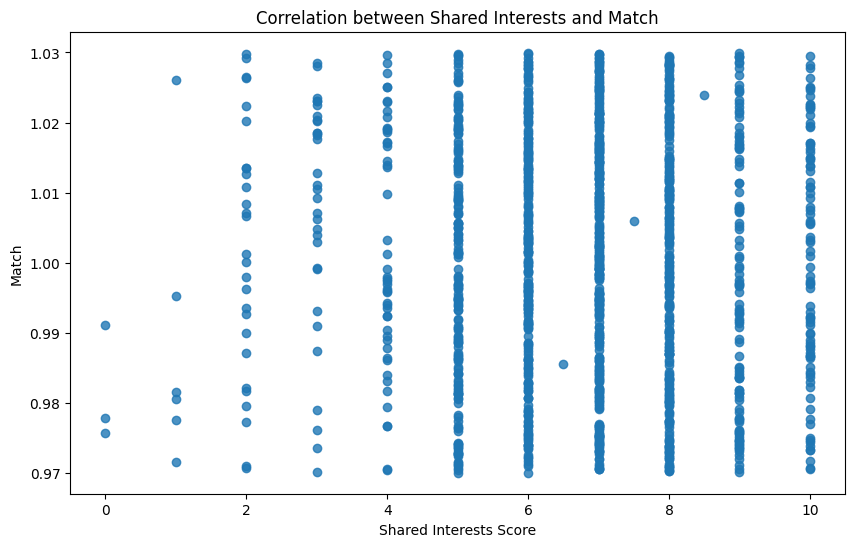

In [ ]:
# Graphique des liens entre intérêt partagé et match
data_match = data[data['match'] == 1]

# Graphique
plt.figure(figsize=(10, 6))
sns.regplot(x='shar', y='match', data=data_match, logistic=True, y_jitter=0.03)
plt.title('Correlation between Shared Interests and Match')
plt.xlabel('Shared Interests Score')
plt.ylabel('Match')
plt.show()

- Le fait d'être dans la **même tranche d'âge, a très peu d'impacte** sur le fait d'avoir d'un match (0.05454 de corrélation positive).
- Le fait d'avoir la **même ethnie à encore moins d'importance** (0.012562 de corrélation positive).
- La majorité des partcipants n'**accordent pas ou très peu d'importance au fait d'avoir la même religion**, on constate cependant que les femme fournissent en moyenne un point d'importance en plus que le hommes (femmes env. 4/10, homme env. 3/10).
- Le fait d'avoir des **intérêts communs est corrélés positivement** avec match à 0.270794, c'est donc un points important à prendre en compte dans le fait d'**obtenir un second rendez-vous**.
- Le fait d'avoir plus de 4 points/10 d'intéret en commun notamment est très corrélé avec un second match.

###Attributs

In [ ]:
# Renommer les attributs
rename_columns = {
    'attr1_1': 'Attractiveness',
    'sinc1_1': 'Sincerity',
    'intel1_1': 'Intelligence',
    'fun1_1': 'Fun',
    'amb1_1': 'Ambition',
    'shar1_1': 'Shared Interests'
}

data = data.rename(columns=rename_columns)

<ipython-input-329-1f7c67d37a40>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




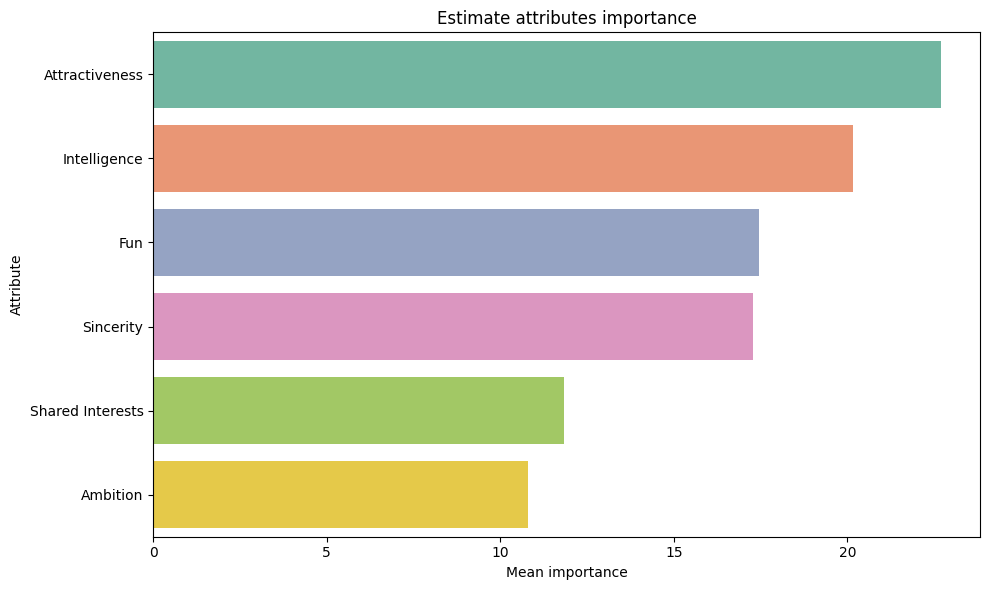

In [ ]:
# Attribut estimés les plus important chez un partenaire
data = data.rename(columns=rename_columns)

attributes = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']
attribute_means = data.groupby('iid')[attributes].mean().mean()

attribute_means_df = pd.DataFrame({'Attribute': attributes, 'Mean Importance': attribute_means.values})

attribute_means_df_sorted = attribute_means_df.sort_values('Mean Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Importance', y='Attribute', data=attribute_means_df_sorted, palette='Set2')
plt.title('Estimate attributes importance')
plt.xlabel('Mean importance')
plt.ylabel('Attribute')
plt.tight_layout()
plt.show()

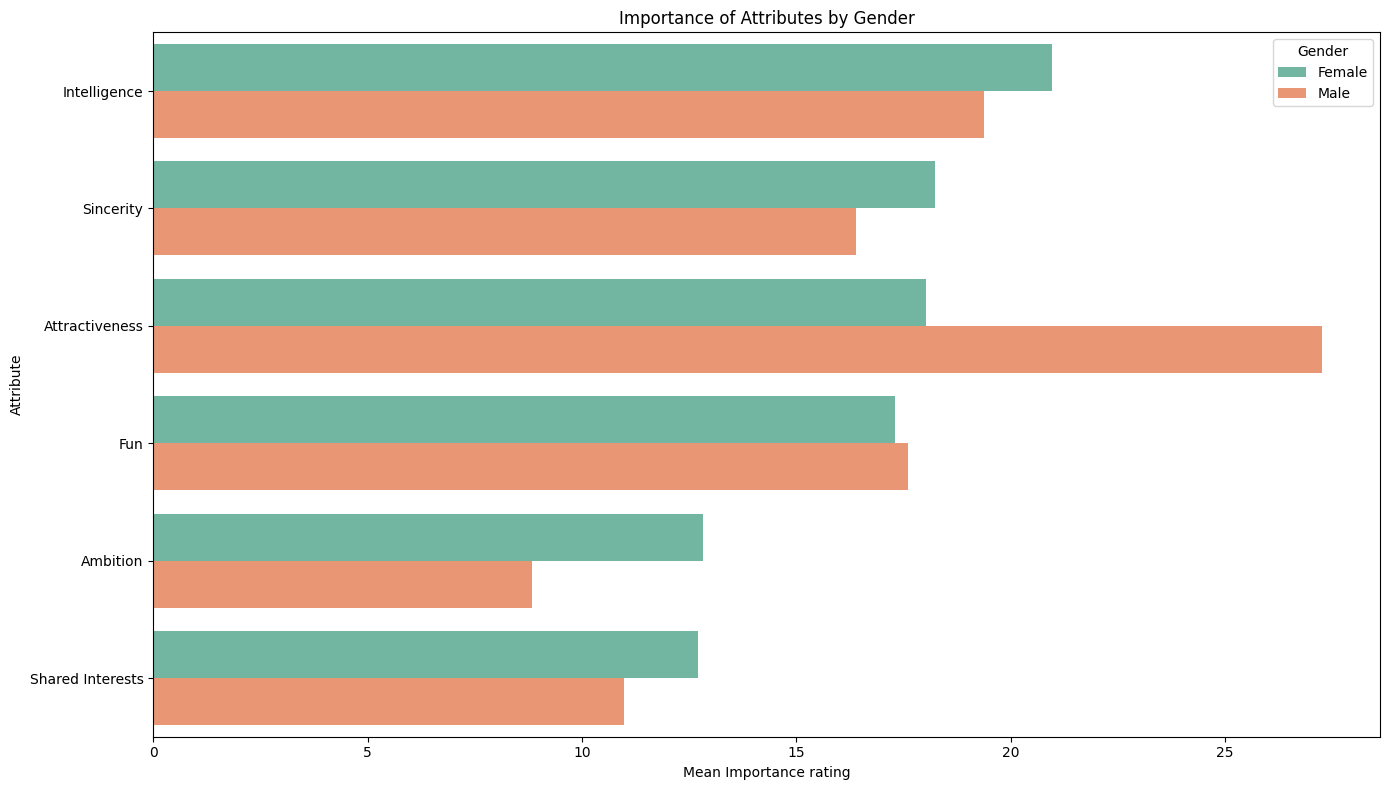

In [ ]:
# Attributs désirés pour chaque genre
attribute_means_male = data[data['gender'] == 'Male'].drop_duplicates(subset='iid')[attributes].mean()
attribute_means_female = data[data['gender'] == 'Female'].drop_duplicates(subset='iid')[attributes].mean()


attribute_means_male_df = pd.DataFrame({'Attribute': attributes, 'Mean Importance': attribute_means_male.values, 'Gender': 'Male'})
attribute_means_female_df = pd.DataFrame({'Attribute': attributes, 'Mean Importance': attribute_means_female.values, 'Gender': 'Female'})
attribute_means_gender_df = pd.concat([attribute_means_male_df, attribute_means_female_df])
attribute_means_gender_df_sorted = attribute_means_gender_df.sort_values(['Gender', 'Mean Importance'], ascending=[True, False])

# Graphique
plt.figure(figsize=(14, 8))
sns.barplot(x='Mean Importance', y='Attribute', hue='Gender', data=attribute_means_gender_df_sorted, palette='Set2')
plt.title('Importance of Attributes by Gender')
plt.xlabel('Mean Importance rating')
plt.ylabel('Attribute')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


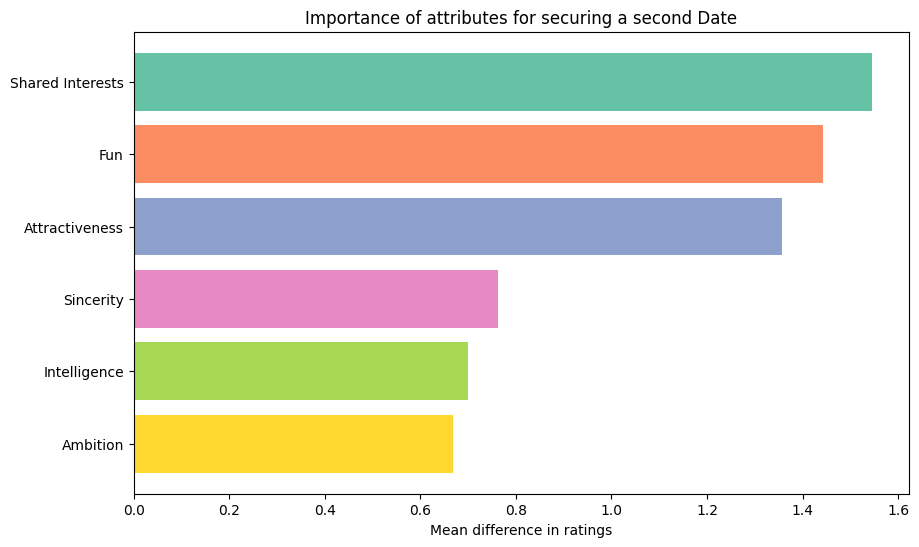

In [ ]:
# Importance des attributs pour un second date

# Renommer les attributs
rating_columns = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
full_attribute_names = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

# Calcul de la différence moyenne des évaluations entre les matches et les non-matches pour chaque attribut
means_matched = data[data['match'] == 1][rating_columns].mean()
means_not_matched = data[data['match'] == 0][rating_columns].mean()
mean_differences = means_matched - means_not_matched

attributes_difference_df = pd.DataFrame({
    'Attribute': full_attribute_names,
    'Mean Difference': mean_differences.values
})

attributes_difference_df_sorted = attributes_difference_df.sort_values('Mean Difference', ascending=False)

palette_colors = sns.color_palette('Set2', len(attributes_difference_df_sorted))

# Configuration du graphique
plt.figure(figsize=(10, 6))
plt.barh(attributes_difference_df_sorted['Attribute'], attributes_difference_df_sorted['Mean Difference'], color=palette_colors)
plt.xlabel('Mean difference in ratings')
plt.title('Importance of attributes for securing a second Date')
plt.gca().invert_yaxis()
plt.show()


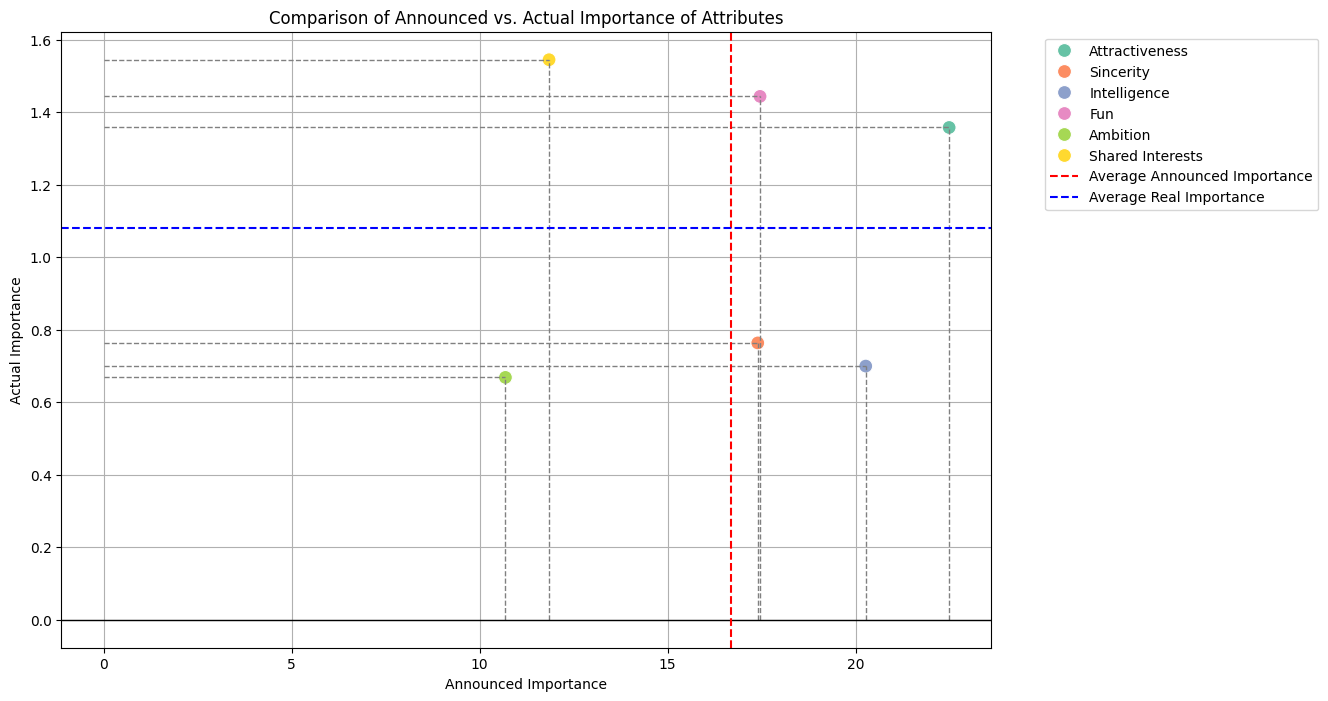

In [ ]:
# Attributs annoncés comme importants
announced_importance = data[['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']].mean()

# Attributs effectivement importants pour match
actual_importance = mean_differences

# Comparaison
comparison_df = pd.DataFrame({
    'Attribute': announced_importance.index,
    'Announced Importance': announced_importance.values,
    'Actual Importance': actual_importance.values
})

# Calcul de la moyenne des importances réelles
average_real_importance = actual_importance.mean()


# Création du graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(data=comparison_df, x='Announced Importance', y='Actual Importance', hue='Attribute', palette='Set2', s=100)

for _, row in comparison_df.iterrows():
    plt.plot([row['Announced Importance'], row['Announced Importance']], [0, row['Actual Importance']], color='grey', linestyle='--', linewidth=1)
    plt.plot([0, row['Announced Importance']], [row['Actual Importance'], row['Actual Importance']], color='grey', linestyle='--', linewidth=1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axhline(0, color='black', lw=1)
plt.axvline(data[attributes].mean().mean(), color='red', linestyle='--', label='Average Announced Importance')
plt.axhline(y=average_real_importance, color='blue', linestyle='--', label='Average Real Importance')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Comparison of Announced vs. Actual Importance of Attributes')
plt.xlabel('Announced Importance')
plt.ylabel('Actual Importance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

- **L'intelligence et l'attractivité** sont jugées comme **très importantes chez un partenaire.**
Les hommes apportent plus d'importance à l'attractivité que les femmes.
- A l'inverse **l'ambition et les intérêts partagés sont des critères jugés peut importants** chez un partenaire potentiel d'autant plus pour les hommes.
- Hors nous avions vu que les intérêts partagés étaient très corrélés avec un second date, en effet les visualisations montre que **l'intérêt partagé est le critère le plus important pour sécuriser un second date, suivit de l'attractivité et du fun.**
- A l'inverse **l'ambition, l'intelligence et la sincérité sont les critères les moins importants pour sécuriser un match.**
- Il y'a donc un **décalage** entre ce que les candidats **considèrent comme important et ce qu'il choisissent** finalement.

- On peut penser que ce là est du à **la durée des date qui est rapide** lors des speed dating, ainsi des qualités comme l'intelligence et l'ambition sont plutôt difficile à estimer alors que l'attractivité et le fun sont rapidement identifiables. L'intérêt commun ou non est également facile à estimer en speed dating la conversation peut rapidement s'orienter vers ce qu'on aime ou pas dans la vie.

### A la recherche d'autres critères pour obtenir un match

<ipython-input-333-1adc68bbddfe>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



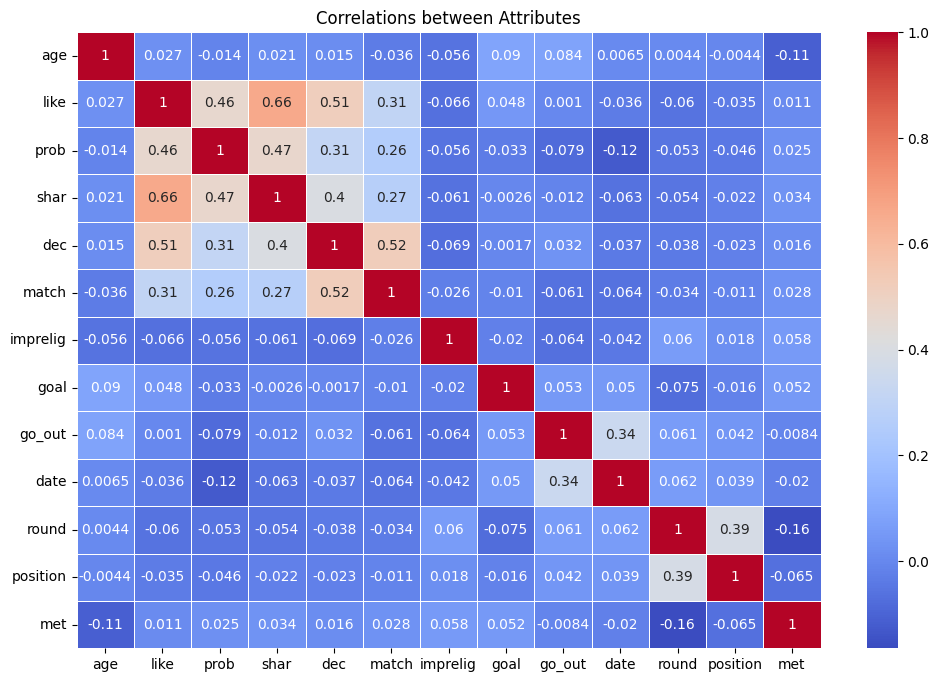

In [ ]:
 #Sélection des colonnes pertinentes
corr_columns = [

    'age', 'gender','like', 'prob', 'shar', 'dec', 'match', 'imprelig', 'goal', 'income', 'go_out', 'date', 'round', 'position', 'met'
]
data_corr = data[corr_columns]

# Calcul de la matrice de corrélation
corr_matrix = data_corr.corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlations between Attributes")
plt.show()

In [ ]:
 #Sélection des colonnes pertinentes
corr_columns = [

    'age', 'gender','like', 'prob', 'shar', 'dec', 'match', 'imprelig', 'goal', 'income', 'go_out', 'date', 'round', 'position', 'met','more_than_5_matches'
]
data_corr = data[corr_columns]

# Calcul de la matrice de corrélation
corr_matrix = data_corr.corr()

# Création de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlations between Attributes")
plt.show()

*Corrélations*: like prob shar dec et match sont corrélés positivement entre eux.

- **Prob** : "How probanle do you think this personne will say yes to you? " est plutôt bien corrélé avec un match, on peut donc supposé que les personnes arrivent bien à savoir quand le courant est passé et quelles souhaitent se revoir.
- **dec** est corrélé car il correspond à la décision de du participant de revoir l'autre personne(donc si dec est positif il y'a déjà une chance sur 2 que le match le soit aussi).
- **like** correspond au fait d'avoir apprécié plus ou moins la personne.
- **shar** correspond aux intérêts partagées dont nous avons déjà parlé.



- Le fait de **sortir souvent**, d'**aller souvent en date** ou encore l'**objectif** par rapport à ces speed dating ne sont **pas corrélé** avec le fait **d'obtenir second date**.

<ipython-input-334-067c21dd66aa>:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



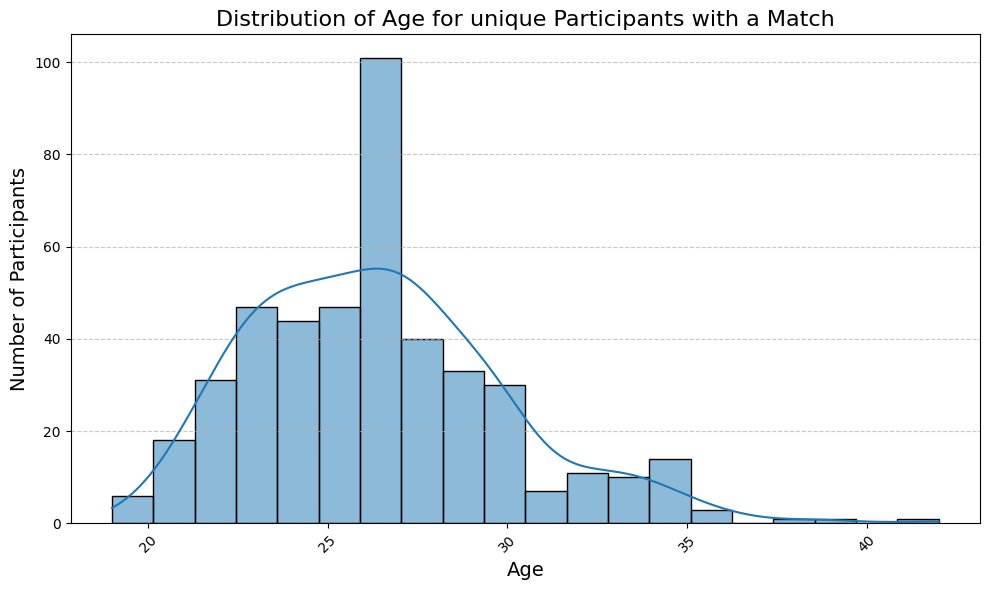

In [ ]:
# Graphique de distribution de l'âge des participants avec un match
matched_data = data[data['match'] == 1]
unique_matched_data = matched_data.drop_duplicates(subset='iid')

# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(unique_matched_data['age'], bins=20, kde=True, palette='coolwarm')
plt.title('Distribution of Age for unique Participants with a Match', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

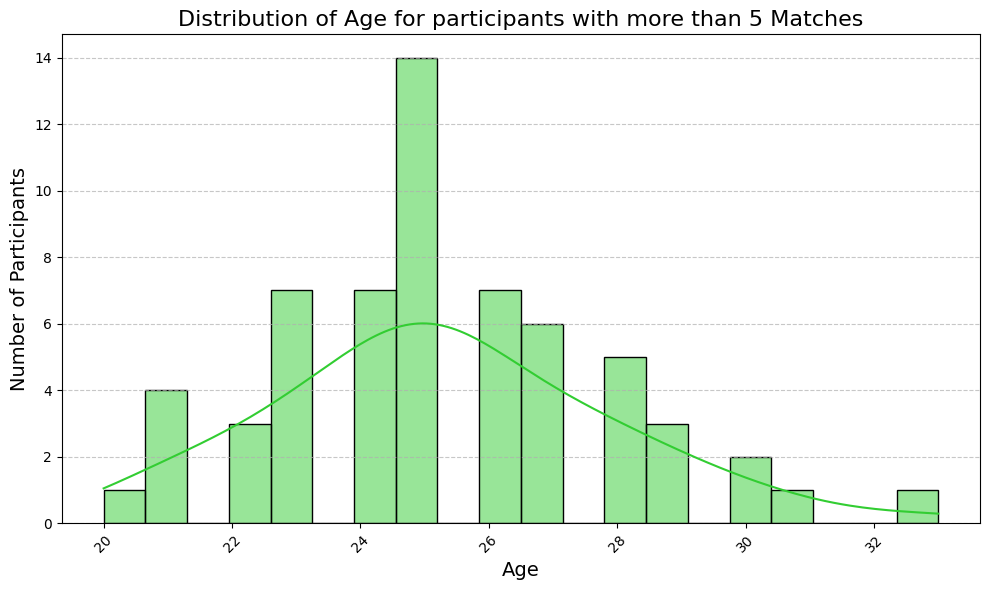

In [ ]:
# # Age des personnes avec le plus de succès (plus de 5 matches positifs)
participants_more_than_5_matches = data[data['more_than_5_matches'] == 1]
unique_iid_more_than_5_matches = participants_more_than_5_matches.drop_duplicates(subset='iid')

# Histogramme de la distribution des âges
plt.figure(figsize=(10, 6))
sns.histplot(unique_iid_more_than_5_matches['age'], bins=20, kde=True, color='limegreen')
plt.title('Distribution of Age for participants with more than 5 Matches', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- La majorité des participants avec **au moins un match ont entre 22 et 31 ans**, avec un **pic autour de 26/27 ans**.
La distribution est **asymétrique vers la droite** suggérant que la plupart des personnes qui ont matchées sont plutôt jeunes.
- La distribution des âges pour les participants avec **plus de 5 matches** est plus **symétrique** et distribuée autour d'un **pic à 25 ans**.

- Les participants qui comptent le plus de matches ont eutre 20 et 32 ans avec un pic à 25 ans

<ipython-input-336-c8ebe95c6d7d>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




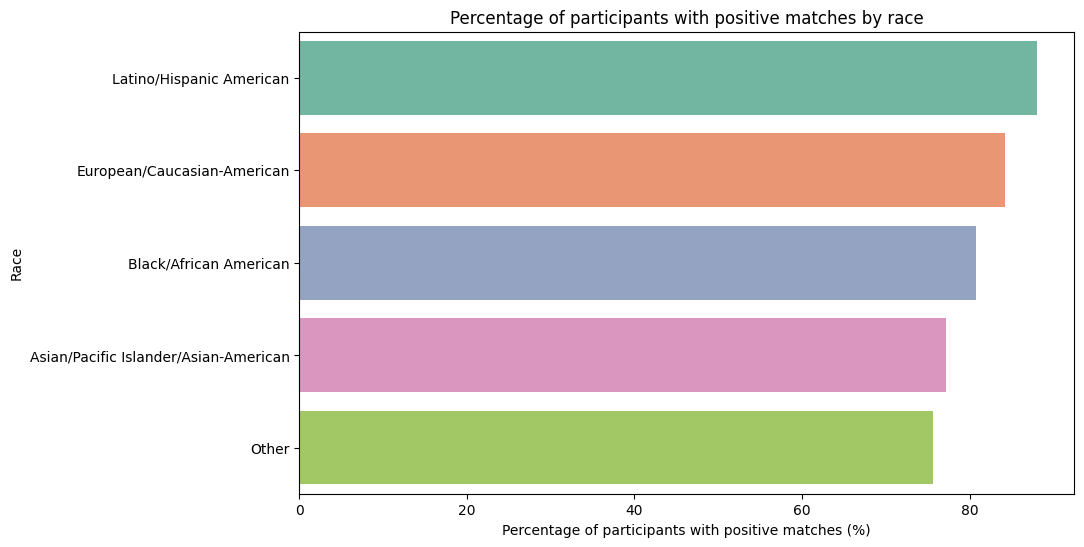

In [ ]:
# Ethnie les plus appréciées dans les matches
participants_with_matches = data[data['match'] == 1]
total_participants_per_ethnicity = data.drop_duplicates(subset='iid')['race'].value_counts()

participants_with_matches_per_ethnicity = participants_with_matches.drop_duplicates(subset='iid')['race'].value_counts()
match_percentage_per_ethnicity = (participants_with_matches_per_ethnicity / total_participants_per_ethnicity) * 100

match_percentage_per_ethnicity = match_percentage_per_ethnicity.sort_values(ascending=False)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=match_percentage_per_ethnicity.values, y=match_percentage_per_ethnicity.index, palette='Set2')
plt.title('Percentage of participants with positive matches by race')
plt.xlabel('Percentage of participants with positive matches (%)')
plt.ylabel('Race')
plt.show()


<ipython-input-337-d78809a0237c>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




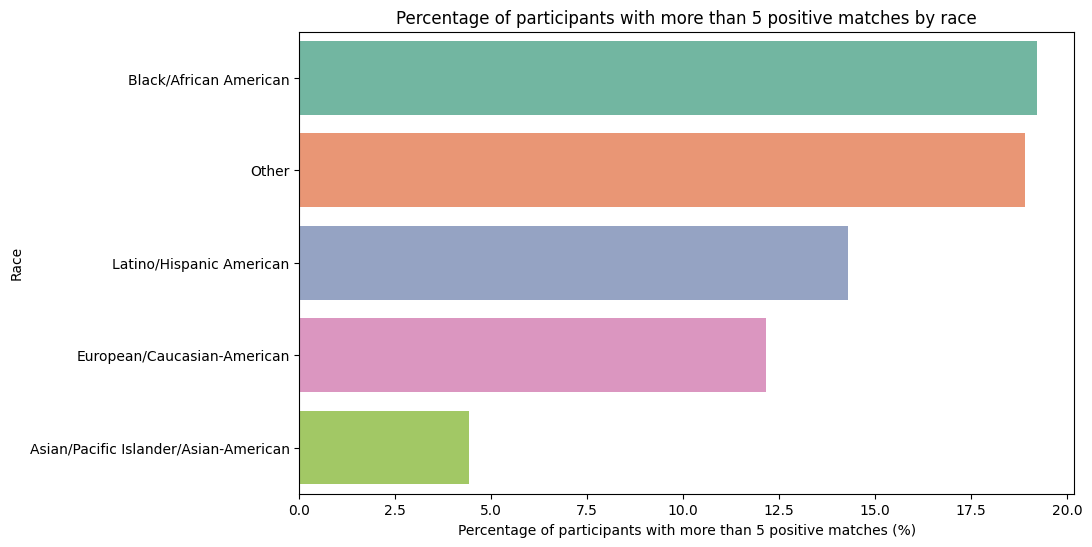

In [ ]:
# Ethnie les plus appréciées pour les personnes qui ont plus de 5 matches
participants_more_than_5_matches = data[data['more_than_5_matches'] == 1]
total_participants_per_ethnicity = data.drop_duplicates(subset='iid')['race'].value_counts()

participants_more_than_5_matches_per_ethnicity = participants_more_than_5_matches.drop_duplicates(subset='iid')['race'].value_counts()
match_percentage_per_ethnicity_more_than_5_matches = (participants_more_than_5_matches_per_ethnicity / total_participants_per_ethnicity) * 100

match_percentage_per_ethnicity_more_than_5_matches = match_percentage_per_ethnicity_more_than_5_matches.sort_values(ascending=False)

# Création du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=match_percentage_per_ethnicity_more_than_5_matches.values, y=match_percentage_per_ethnicity_more_than_5_matches.index, palette='Set2')
plt.title('Percentage of participants with more than 5 positive matches by race')
plt.xlabel('Percentage of participants with more than 5 positive matches (%)')
plt.ylabel('Race')
plt.show()


- **L'éthnie la plus populaire** pour obtenir au moins **1 match est 'Latino/hispanique'** mais elle **se démarque de peu**.

- **L'éthnie 'Black/African American'** et les **'others** ' **se démarquent**   beaucoup plus dans le groupe de ceux qui ont plus de **5 matches**, parmis eux c'est l'ethnie 'asian/pacific' qui a eu le moins de succès.

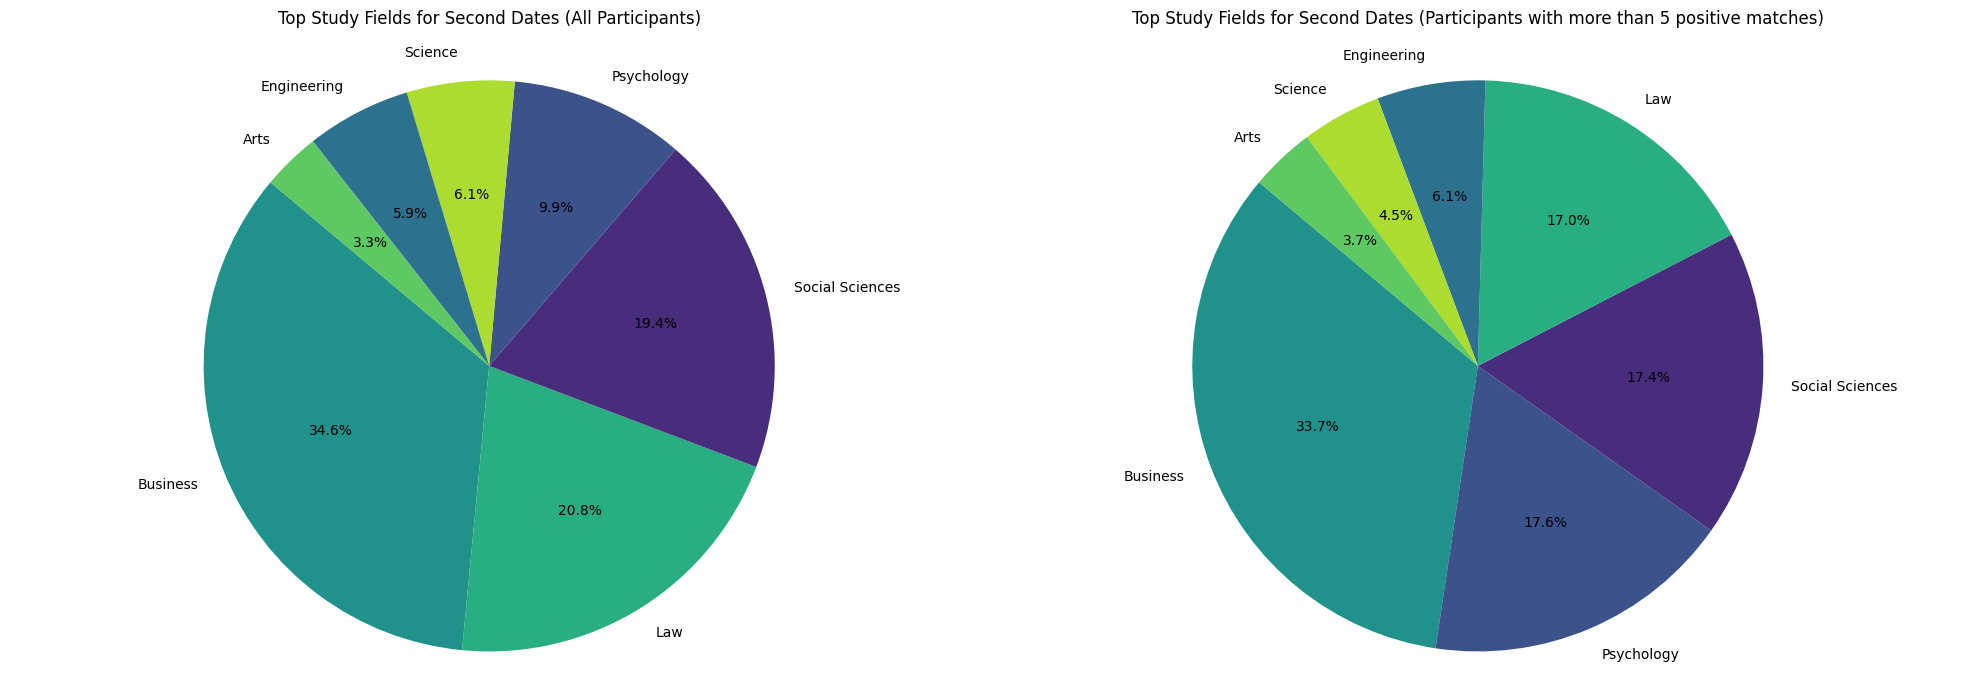

In [ ]:
# Calculer le nombre de participants ayant eu un deuxième rendez-vous par domaine d'étude pour l'ensemble des participants
palette = sns.color_palette('viridis', len(total_percentage_matches_sorted))

participants_with_match = data[data['match'] == 1]

unique_iids_with_match = participants_with_match.drop_duplicates(subset='iid')['iid']
participants_with_match_unique_iids = participants_with_match[participants_with_match['iid'].isin(unique_iids_with_match)]
total_participants_per_field = participants_with_match_unique_iids['field_category'].value_counts()

total_percentage_matches = (total_participants_per_field / len(participants_with_match_unique_iids)) * 100
total_percentage_matches_sorted = total_percentage_matches.sort_values(ascending=False)


participants_more_than_5_matches = data[data['more_than_5_matches'] == 1]
unique_iids_more_than_5_matches = participants_more_than_5_matches['iid'].unique()
unique_iids_data_more_than_5_matches = data[data['iid'].isin(unique_iids_more_than_5_matches)]

total_participants_per_field_more_than_5 = unique_iids_data_more_than_5_matches['field_category'].value_counts()
total_percentage_more_than_5_matches = (total_participants_per_field_more_than_5 / len(unique_iids_data_more_than_5_matches)) * 100


all_categories = set(total_percentage_matches_sorted.index) | set(total_percentage_more_than_5_matches.index)
palette = sns.color_palette('viridis', len(all_categories))
category_colors = dict(zip(all_categories, palette))

# Visualisations
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Plot pour tous les participants ayant eu un match
axs[0].pie(total_percentage_matches_sorted, labels=total_percentage_matches_sorted.index, autopct='%1.1f%%', startangle=140, colors=[category_colors[category] for category in total_percentage_matches_sorted.index])
axs[0].set_title('Top Study Fields for Second Dates (All Participants)', pad=20)
axs[0].axis('equal')

# Plot pour les participants ayant eu plus de 5 matches
axs[1].pie(total_percentage_more_than_5_matches_sorted, labels=total_percentage_more_than_5_matches_sorted.index, autopct='%1.1f%%', startangle=140, colors=[category_colors[category] for category in total_percentage_more_than_5_matches_sorted.index])
axs[1].set_title('Top Study Fields for Second Dates (Participants with more than 5 positive matches)', pad=20)
axs[1].axis('equal')

plt.tight_layout()
plt.show()


- La répartition des études pour les personnes ayant obtenu un match reste assez proche de la répartition initiale avec beaucoup de participants en études de business, sciences sociales et droit. Les étudiants en **arts, psychologie et droit** sont **plus réprésenté dans les matchs** que dans la répartition générale.
- Pour les plus populaires, **la psychologie** vient se démarquer **avec 17,6%** de participants qui ont eu **plus de 5 matchs** contre 9,9% pour un seul match

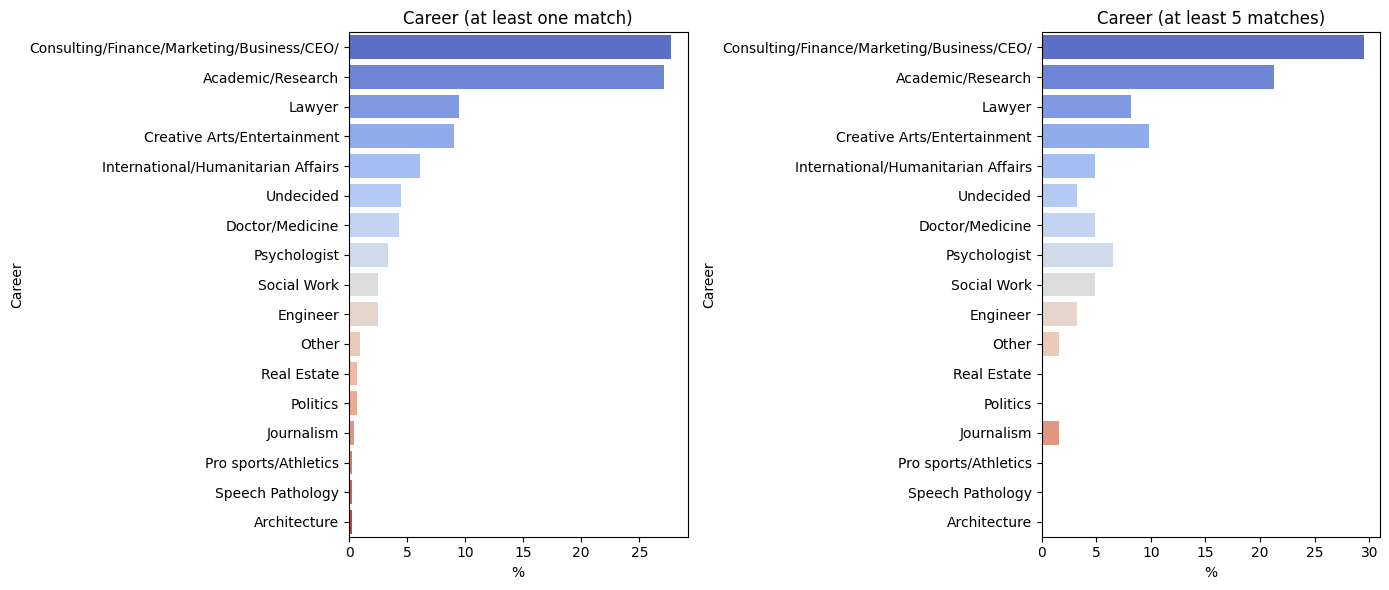

In [ ]:
# Carrière des participants avec un match ou plus
data_with_matches = data[data['match'] > 0]
career_counts_with_matches = data_with_matches.drop_duplicates(subset=['iid'])['career_c'].map(career_mapping).value_counts()

# Filtrer les données pour les participants ayant eu plus de 5 matches
participants_more_than_5_matches = data[data['more_than_5_matches'] == 1]
unique_iids_more_than_5_matches = participants_more_than_5_matches['iid'].unique()
data_most_matches = data[data['iid'].isin(unique_iids_more_than_5_matches)]
career_counts_most_matches = data_most_matches.drop_duplicates(subset=['iid'])['career_c'].map(career_mapping).value_counts()

all_career_counts = pd.concat([career_counts_with_matches, career_counts_most_matches], axis=1)
all_career_counts.columns = ['At least 1 match', 'More than 5 matches']
all_career_counts = all_career_counts.fillna(0)
all_career_counts['Total'] = all_career_counts['At least 1 match'] + all_career_counts['More than 5 matches']
all_career_counts = all_career_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

all_career_counts_percent = all_career_counts.div(all_career_counts.sum(axis=0), axis=1) * 100

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Premier subplot pour les participants avec au moins un match
sns.barplot(x=all_career_counts_percent['At least 1 match'], y=all_career_counts_percent.index, ax=axs[0], palette='coolwarm')
axs[0].set_title('Career (at least one match)')
axs[0].set_xlabel('%')
axs[0].set_ylabel('Career')

# Deuxième subplot pour les participants avec plus de 5 matches
sns.barplot(x=all_career_counts_percent['More than 5 matches'], y=all_career_counts_percent.index, ax=axs[1], palette='coolwarm')
axs[1].set_title('Career (at least 5 matches)')
axs[1].set_xlabel('%')
axs[1].set_ylabel('Career')

plt.tight_layout()
plt.show()


-  Les carrières envisagées tout comme les études restent assez proches de la répartitions générales, on observe que **le business prend la tête** face à la **carrière académique** en ce qui concerne les personnes qui ont des match, d'autant plus si le nombre de matchs est importants.
- **Les arts et le métier de psychologue** sont plus présents chez les candidats populaires (en relation avec le domaine d'études que l'on a pu voir plus haut).
- On observe que les aspirants **journalistes** (qui ne sont que des femmes) sont plus représentés dans le groupe de **candidats populaires** que chez ceux qui ont moins de matchs.

In [13]:
# Correlation du revenu avec un second date
data_revenue_match = data[['income', 'match']]

data_revenue_match = data_revenue_match.dropna()
data_revenue_match['income'] = data_revenue_match['income'].str.replace(',', '').astype(float)

correlation = data_revenue_match['income'].corr(data_revenue_match['match'])

print("Corrélation entre les revenus et les seconds rendez-vous:", correlation)

Corrélation entre les revenus et les seconds rendez-vous: 0.026538741789018164


<ipython-input-22-9601f71574fb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Match', 'No match', 'More than 5 matches'], y=[mean_income_match, mean_income_no_match, mean_income_more_than_5_matches], palette='viridis')


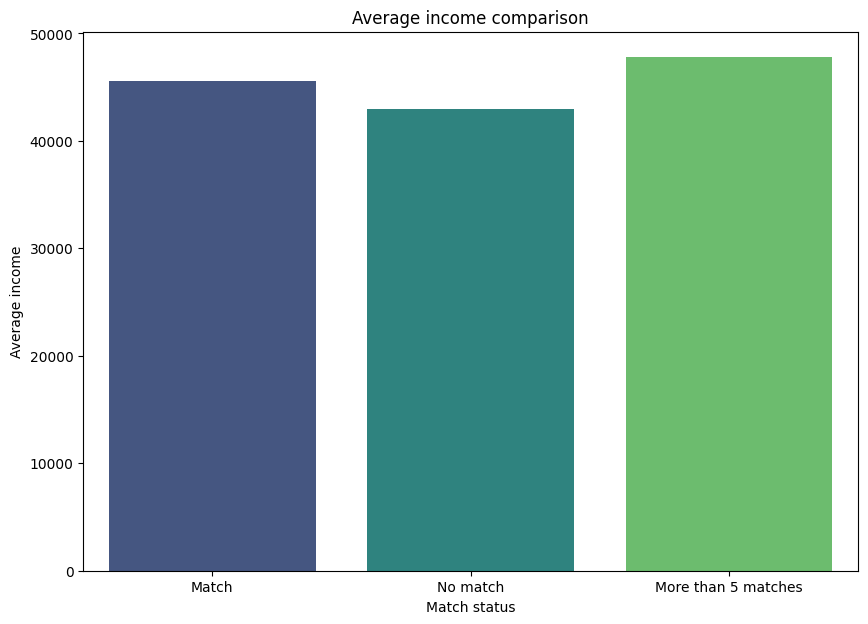

In [22]:
# Revenus moyen et match
data_revenue_match = data[['income', 'match', 'more_than_5_matches']]

# Supprimer les lignes avec des valeurs manquantes dans la colonne 'income'
data_revenue_match = data_revenue_match.dropna(subset=['income'])

# Convertir les valeurs de 'income' en float
data_revenue_match['income'] = data_revenue_match['income'].str.replace(',', '').astype(float)


mean_income_match = data_revenue_match[data_revenue_match['match'] == 1]['income'].median()
mean_income_no_match = data_revenue_match[data_revenue_match['match'] == 0]['income'].median()

matched_data_more_than_5 = data_revenue_match[data_revenue_match['more_than_5_matches'] == 1]
mean_income_more_than_5_matches = matched_data_more_than_5['income'].mean()

# Visualisation
plt.figure(figsize=(10, 7))

sns.barplot(x=['Match', 'No match', 'More than 5 matches'], y=[mean_income_match, mean_income_no_match, mean_income_more_than_5_matches], palette='viridis')
plt.title('Average income comparison')
plt.xlabel('Match status')
plt.ylabel('Average income')

plt.show()


- Le revenus médians sont légèrement plus importants avec nombre de matchs obtenus mais la différence est très faible et très peu corrélée avec le fait d'obtenir un second date.

<ipython-input-343-5e724fa628e9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



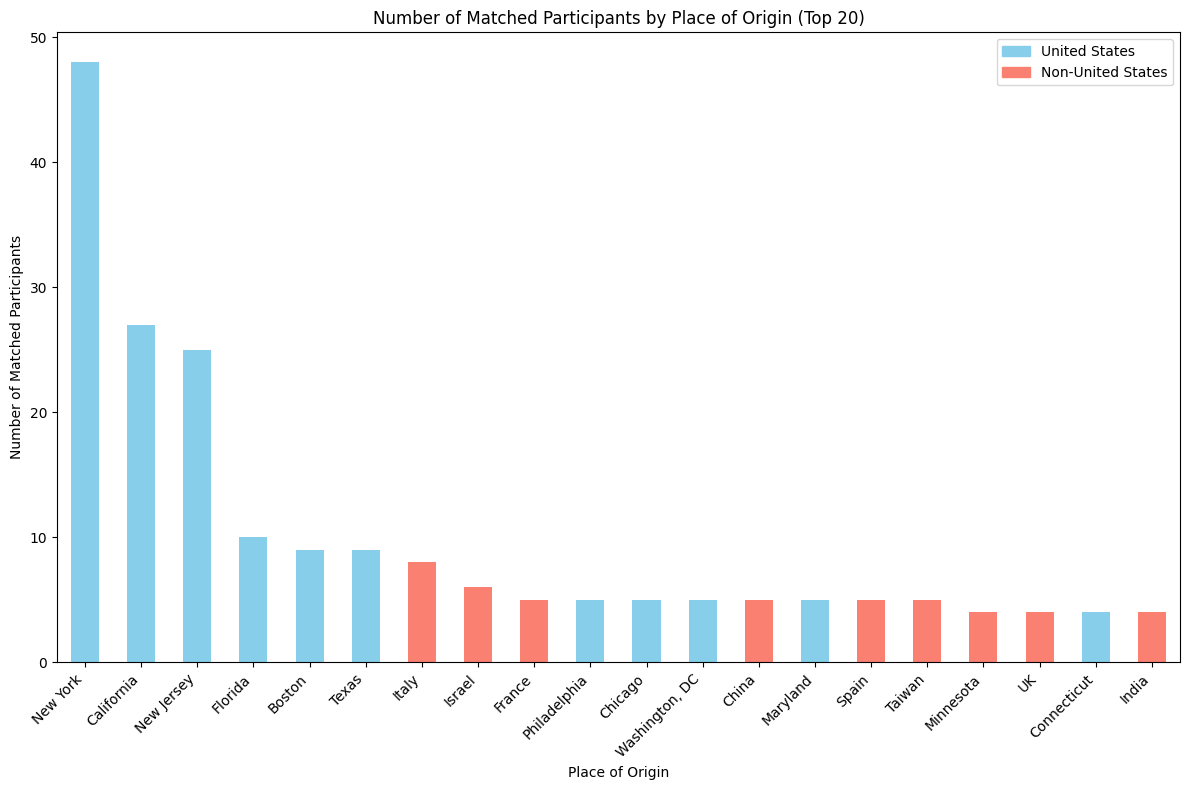

In [ ]:
# D'où viennent les personnes qui ont eu des matchs
matched_data = data[data['match'] == 1]

# Fonction pour déterminer si la ville d'origine est aux États-Unis
def is_us_city(city):
    us_cities = ['New York', 'New Jersey', 'California', 'Boston', 'Texas', 'Maryland', 'NYC', 'Chicago', 'Miami', 'Florida',
                 'Connecticut', 'Boston, MA', 'Philadelphia', 'Los Angeles', 'NJ', 'Washington, DC', 'San Francisco']
    return city in us_cities

matched_data['is_us'] = matched_data['from'].apply(is_us_city)
origin_counts = matched_data.groupby(['from', 'is_us'])['iid'].nunique().sort_values(ascending=False).head(20)

# Graphique
plt.figure(figsize=(12, 8))
colors = ['skyblue' if is_us else 'salmon' for _, is_us in origin_counts.index]
origin_counts.index = origin_counts.index.droplevel(1)  # Supprimer la deuxième colonne True/False
origin_counts.plot(kind='bar', color=colors)
plt.title('Number of Matched Participants by Place of Origin (Top 20)')
plt.xlabel('Place of Origin')
plt.ylabel('Number of Matched Participants')
plt.xticks(rotation=45, ha='right')

# Légende
us_patch = mpatches.Patch(color='skyblue', label='United States')
non_us_patch = mpatches.Patch(color='salmon', label='Non-United States')
plt.legend(handles=[us_patch, non_us_patch])

plt.tight_layout()
plt.show()

<ipython-input-371-c5cf4bd26927>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



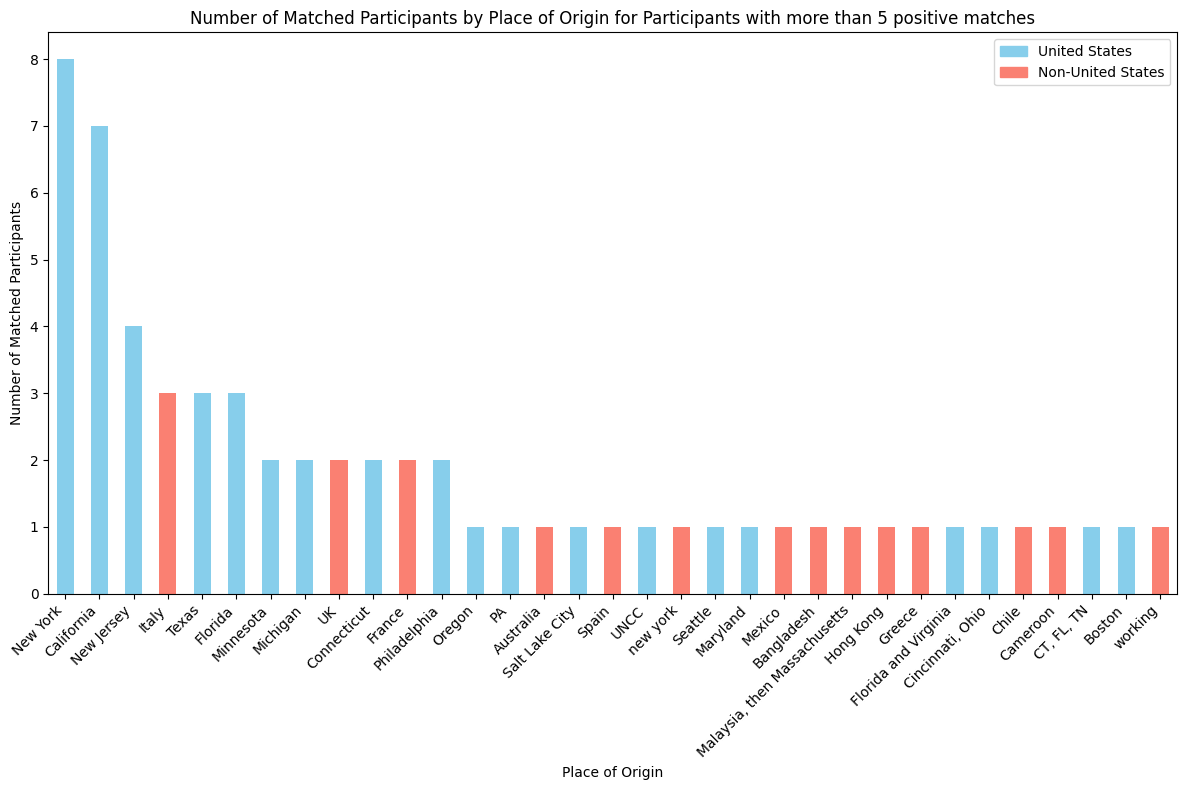

In [ ]:
# Pour les individus ayant plus de 5 matchs positifs
iid_most_matches = matches_count[matches_count['matches_count'] > 5]
matched_data = data[data['iid'].isin(iid_most_matches['iid'])]

# Fonction pour déterminer si la ville d'origine est aux États-Unis
def is_us_city(city):
    us_cities = ['New York', 'New Jersey', 'California', 'Boston', 'Texas', 'Maryland', 'NYC', 'Chicago', 'Miami', 'Florida',
             'Connecticut', 'Boston, MA', 'Philadelphia', 'Los Angeles', 'NJ', 'Washington, DC', 'San Francisco',
             'Staten Island', 'Minneapolis, MN', 'Oregon', 'UNCC', 'Minnesota', 'PA', 'Palm Springs, California',
             'Michigan', 'Ann Arbor, MI', 'Seattle', 'Salt Lake City', 'CT, FL, TN', 'Cincinnati, Ohio',
             'Florida and Virginia']
    return city in us_cities

matched_data['is_us'] = matched_data['from'].apply(is_us_city)
origin_counts = matched_data.groupby(['from', 'is_us'])['iid'].nunique().sort_values(ascending=False)

# Graphique
plt.figure(figsize=(12, 8))
colors = ['skyblue' if is_us else 'salmon' for _, is_us in origin_counts.index]
origin_counts.index = origin_counts.index.droplevel(1)  # Supprimer la deuxième colonne True/False
origin_counts.plot(kind='bar', color=colors)
plt.title('Number of Matched Participants by Place of Origin for Participants with more than 5 positive matches')
plt.xlabel('Place of Origin')
plt.ylabel('Number of Matched Participants')
plt.xticks(rotation=45, ha='right')

# Légende
us_patch = mpatches.Patch(color='skyblue', label='United States')
non_us_patch = mpatches.Patch(color='salmon', label='Non-United States')
plt.legend(handles=[us_patch, non_us_patch])

plt.tight_layout()
plt.show()


In [ ]:
# Ratio des match en fonction de la date du premier "date"
total_matches_per_date = data[data['match'] == 1]['date'].value_counts().sort_index()

# Compter le nombre total de candidats uniques pour chaque date
total_unique_candidates_per_date = data.groupby('date')['iid'].nunique().sort_index()

# Calculer le ratio de matchs pour chaque date
match_ratio_per_date = total_matches_per_date / total_unique_candidates_per_date

# Afficher les ratios de match pour chaque date
print("Ratio de match pour chaque date :")
print(match_ratio_per_date)

Ratio de match pour chaque date :
1.0    4.142857
2.0    2.954545
3.0    2.944444
4.0    2.786260
5.0    2.393939
6.0    2.183824
7.0    2.255319
dtype: float64


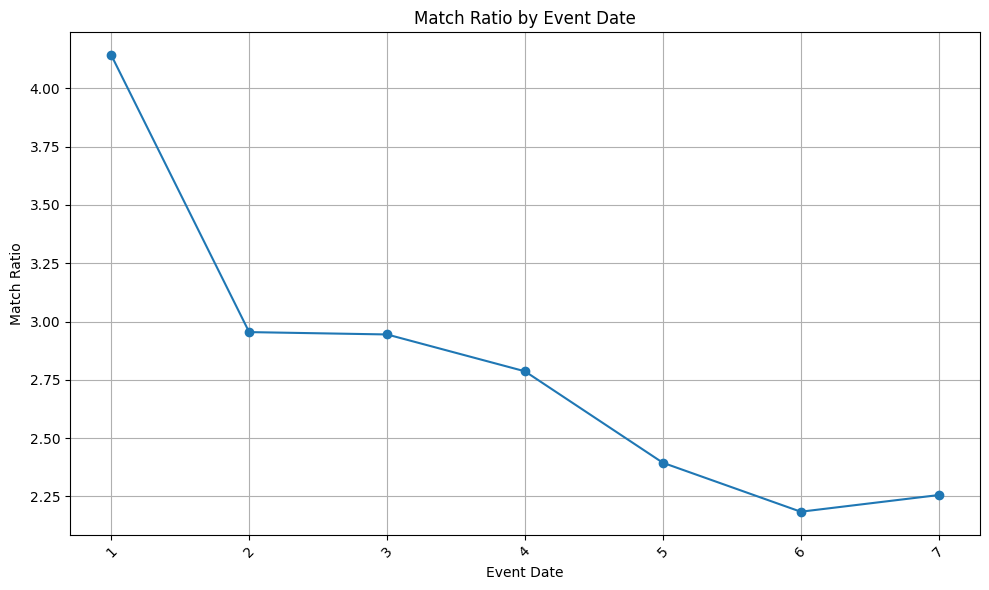

In [ ]:
# Graphique
plt.figure(figsize=(10, 6))
plt.plot(match_ratio_per_date.index, match_ratio_per_date.values, marker='o', linestyle='-')
plt.title('Match Ratio by Event Date')
plt.xlabel('Event Date')
plt.ylabel('Match Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3 - Perception de soi et dates

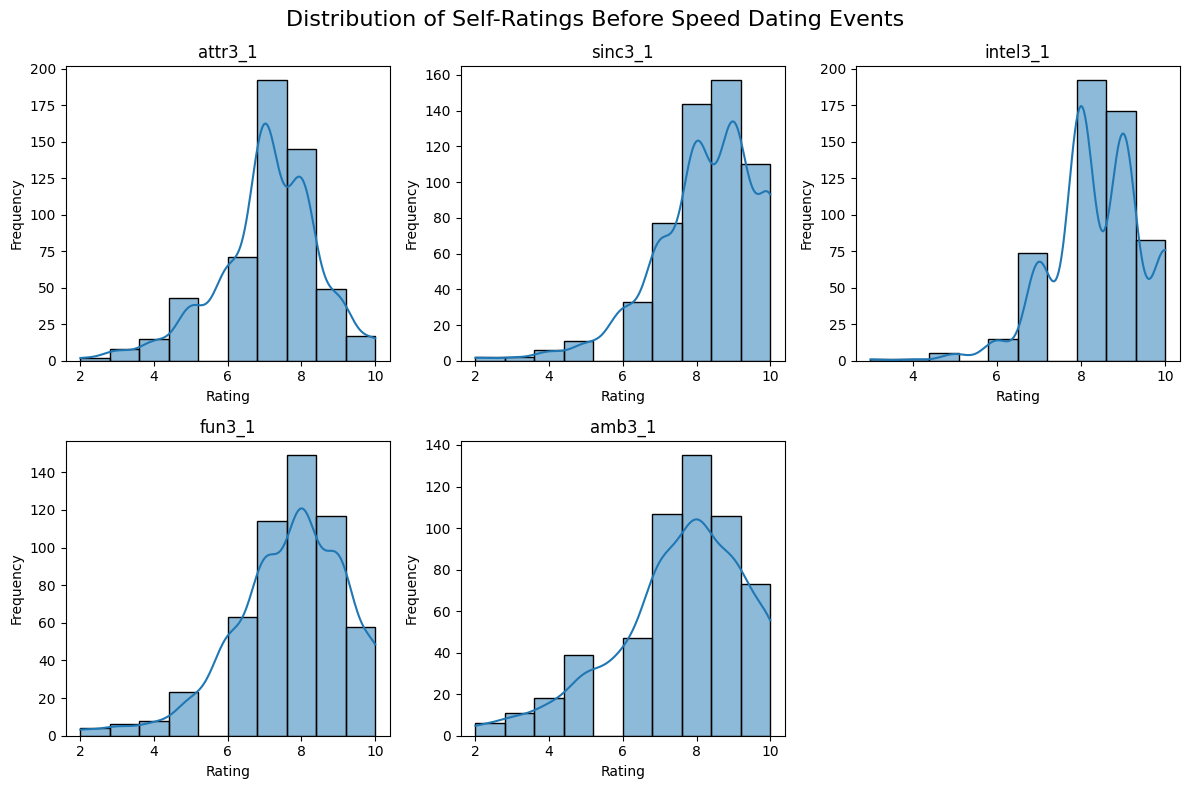

In [ ]:
# Histogrammes pour la distribution des auto-évaluations avant les rendez-vous
data_unique_iid = data.drop_duplicates(subset='iid')
before_event_ratings = data_unique_iid[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean()

plt.figure(figsize=(12, 8))
for i, attribute in enumerate(['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=data_unique_iid, x=attribute.lower(), bins=10, kde=True)
    plt.title(attribute)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

plt.suptitle('Distribution of Self-Ratings Before Speed Dating Events', fontsize=16)
plt.tight_layout()
plt.show()


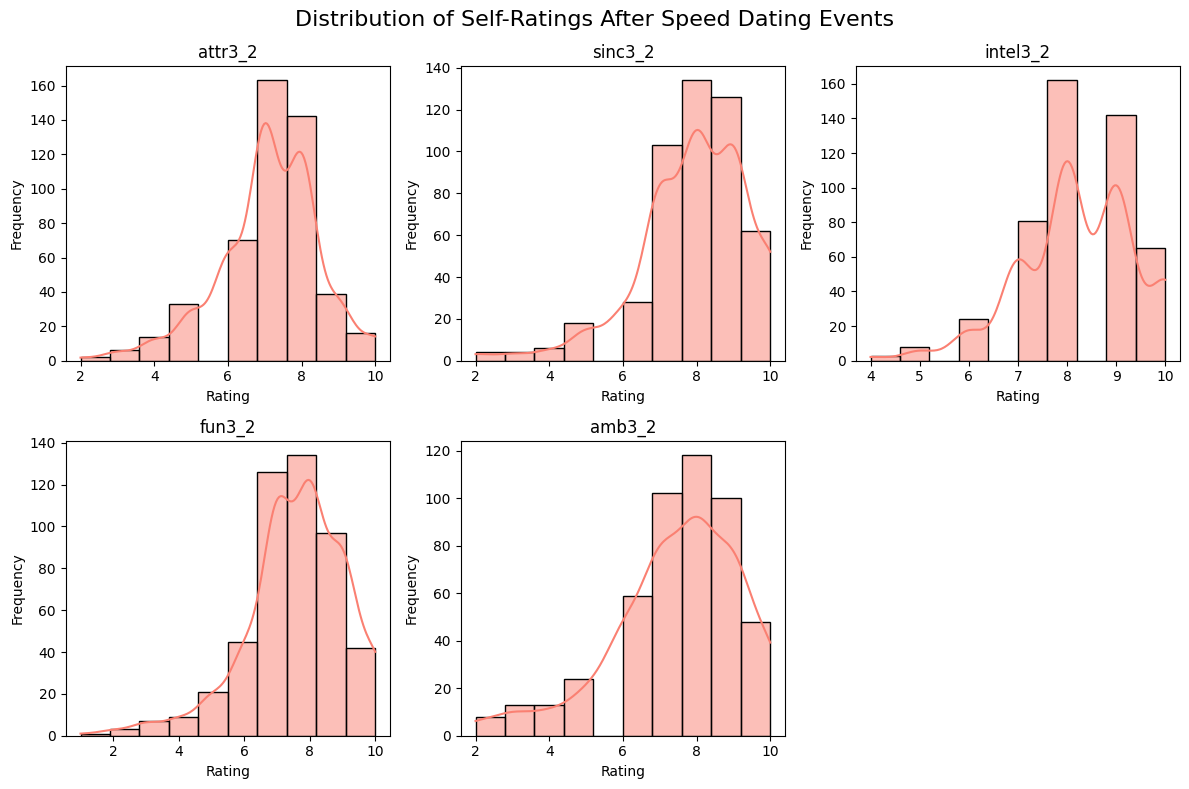

In [ ]:
# Histogrammes pour la distribution des auto-évaluations après les rendez-vous
data_unique_iid = data.drop_duplicates(subset='iid')
after_event_ratings = data_unique_iid.groupby('iid')[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean()

plt.figure(figsize=(12, 8))
for i, attribute in enumerate(['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=data_unique_iid, x=attribute.lower(), bins=10, kde=True, color='salmon')
    plt.title(attribute)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

plt.suptitle('Distribution of Self-Ratings After Speed Dating Events', fontsize=16)
plt.tight_layout()
plt.show()

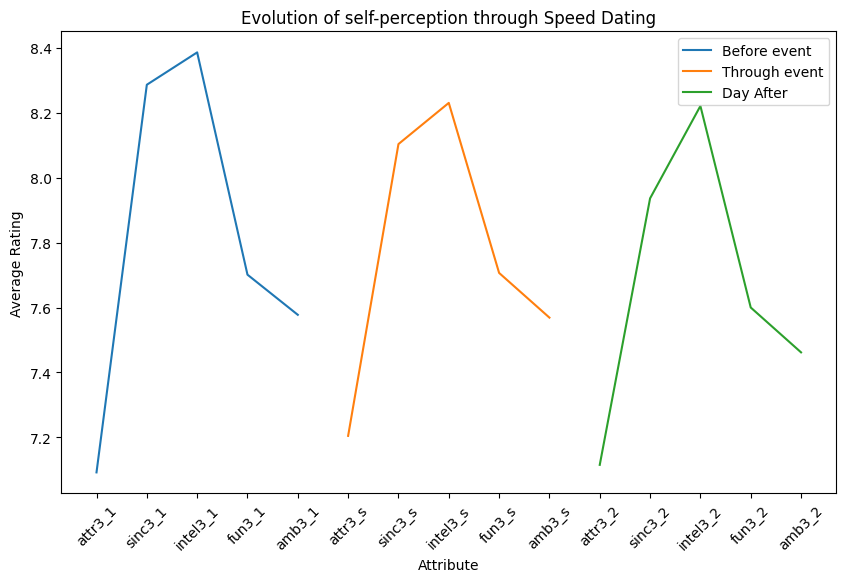

In [ ]:
# Evolution de la perception de soit même au fil des rendez-vous
# Calculer les moyennes des auto-évaluations pour chaque phase du speed dating pour les iids uniques
before_event = data.groupby('iid')[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean().mean()
through_event = data.groupby('iid')[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean().mean()
day_after = data.groupby('iid')[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean().mean()

# Création du graphique d'évolution de la perception de soi
plt.figure(figsize=(10, 6))
plt.plot(before_event, label='Before event')
plt.plot(through_event, label='Through event')
plt.plot(day_after, label='Day After')
plt.title('Evolution of self-perception through Speed Dating')
plt.ylabel('Average Rating')
plt.xlabel('Attribute')
plt.xticks(rotation=45)
plt.legend()
plt.show()


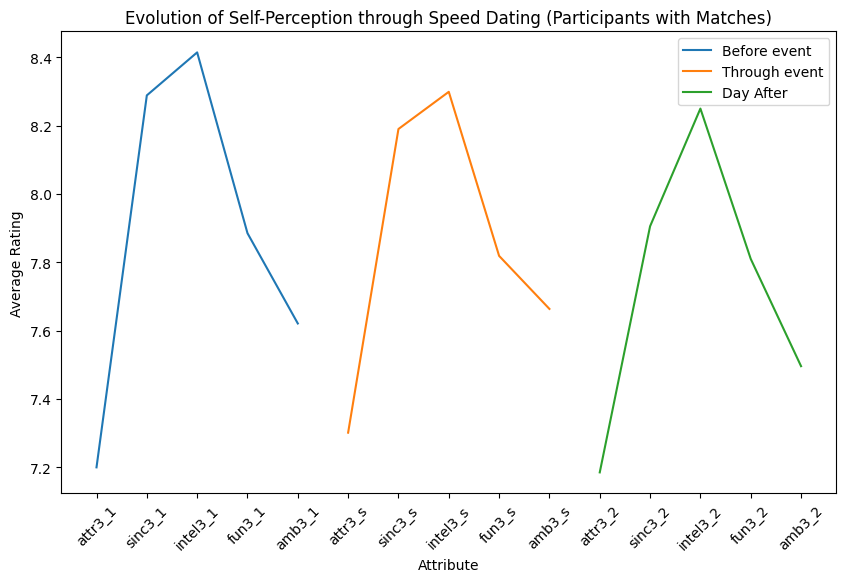

In [ ]:
# Evolution de l'estime de soi pour ceux ayant eu un match
data_with_match = data[data['match'] == 1]
before_event_with_match = data_with_match[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean()
through_event_with_match = data_with_match[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean()
day_after_with_match = data_with_match[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean()

plt.figure(figsize=(10, 6))
plt.plot(before_event_with_match, label='Before event')
plt.plot(through_event_with_match, label='Through event')
plt.plot(day_after_with_match, label='Day After')
plt.title('Evolution of Self-Perception through Speed Dating (Participants with Matches)')
plt.ylabel('Average Rating')
plt.xlabel('Attribute')
plt.xticks(rotation=45)
plt.legend()
plt.show()

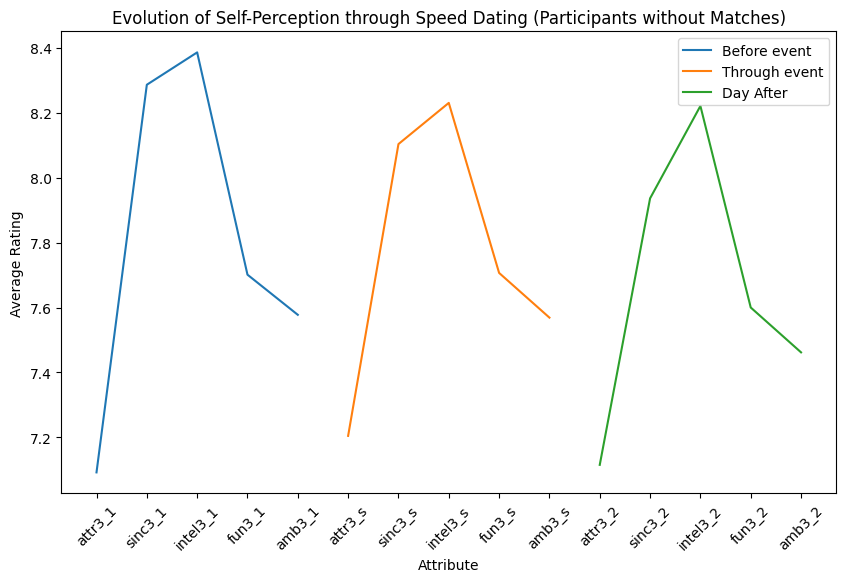

In [ ]:
# Evolution de l'estime de soi pour ceux n'ayant pas de match
data_without_match = data[data['match'] == 0]

# Calculer les moyennes des auto-évaluations pour chaque phase du speed dating pour les participants sans match et en utilisant les iids uniques
before_event_without_match = data_without_match.groupby('iid')[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean().mean()
through_event_without_match = data_without_match.groupby('iid')[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean().mean()
day_after_without_match = data_without_match.groupby('iid')[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean().mean()

# Créer le graphique pour les participants sans match
plt.figure(figsize=(10, 6))
plt.plot(before_event_without_match, label='Before event')
plt.plot(through_event_without_match, label='Through event')
plt.plot(day_after_without_match, label='Day After')
plt.title('Evolution of Self-Perception through Speed Dating (Participants without Matches)')
plt.ylabel('Average Rating')
plt.xlabel('Attribute')
plt.xticks(rotation=45)
plt.legend()

plt.show()

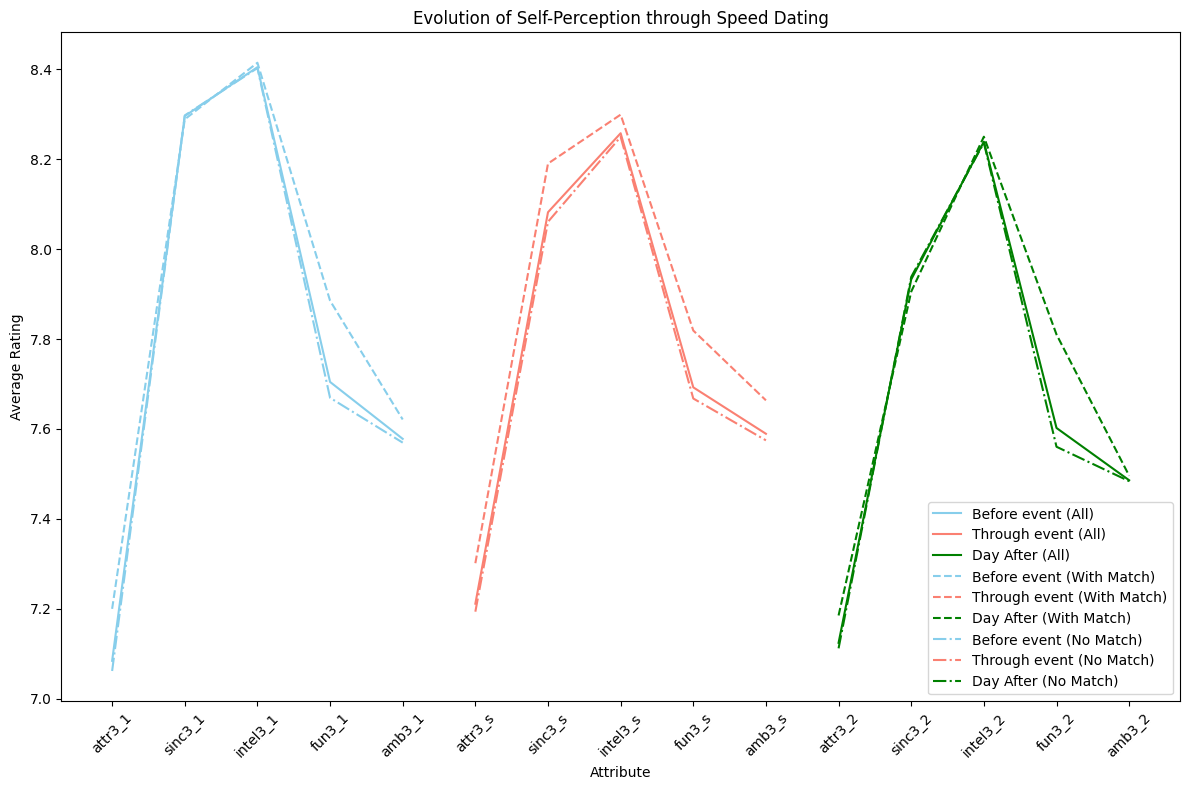

In [ ]:
# Evolution de la perception de soi pour l'ensemble des participants

before_event_all = data[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean(axis=1)
through_event_all = data[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean(axis=1)
day_after_all = data[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean(axis=1)

# Evolution de la perception de soi pour les participants avec un match
data_with_match_unique = data[data['match'] == 1].drop_duplicates(subset='iid')
before_event_with_match = data_with_match_unique[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean(axis=1)
through_event_with_match = data_with_match_unique[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean(axis=1)
day_after_with_match = data_with_match_unique[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean(axis=1)

# Evolution de la perception de soi pour les participants sans match
data_without_match_unique = data[data['match'] == 0].drop_duplicates(subset='iid')
before_event_without_match = data_without_match_unique[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean(axis=1)
through_event_without_match = data_without_match_unique[['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s']].mean(axis=1)
day_after_without_match = data_without_match_unique[['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']].mean(axis=1)

# Création du graphique
plt.figure(figsize=(12, 8))

# Evolution de la perception de soi pour l'ensemble des participants
plt.plot(before_event_all, label='Before event (All)', color='skyblue')
plt.plot(through_event_all, label='Through event (All)', color='salmon')
plt.plot(day_after_all, label='Day After (All)', color='green')

# Evolution de la perception de soi pour les participants avec un match
plt.plot(before_event_with_match, label='Before event (With Match)', linestyle='--', color='skyblue')
plt.plot(through_event_with_match, label='Through event (With Match)', linestyle='--', color='salmon')
plt.plot(day_after_with_match, label='Day After (With Match)', linestyle='--', color='green')

# Evolution de la perception de soi pour les participants sans match
plt.plot(before_event_without_match, label='Before event (No Match)', linestyle='-.', color='skyblue')
plt.plot(through_event_without_match, label='Through event (No Match)', linestyle='-.', color='salmon')
plt.plot(day_after_without_match, label='Day After (No Match)', linestyle='-.', color='green')

plt.title('Evolution of Self-Perception through Speed Dating')

In [ ]:
# Définition des noms d'attributs
attribute_names = {
    'attr3_1': 'Attractiveness',
    'sinc3_1': 'Sincerity',
    'intel3_1': 'Intelligence',
    'fun3_1': 'Fun',
    'amb3_1': 'Ambition'
}



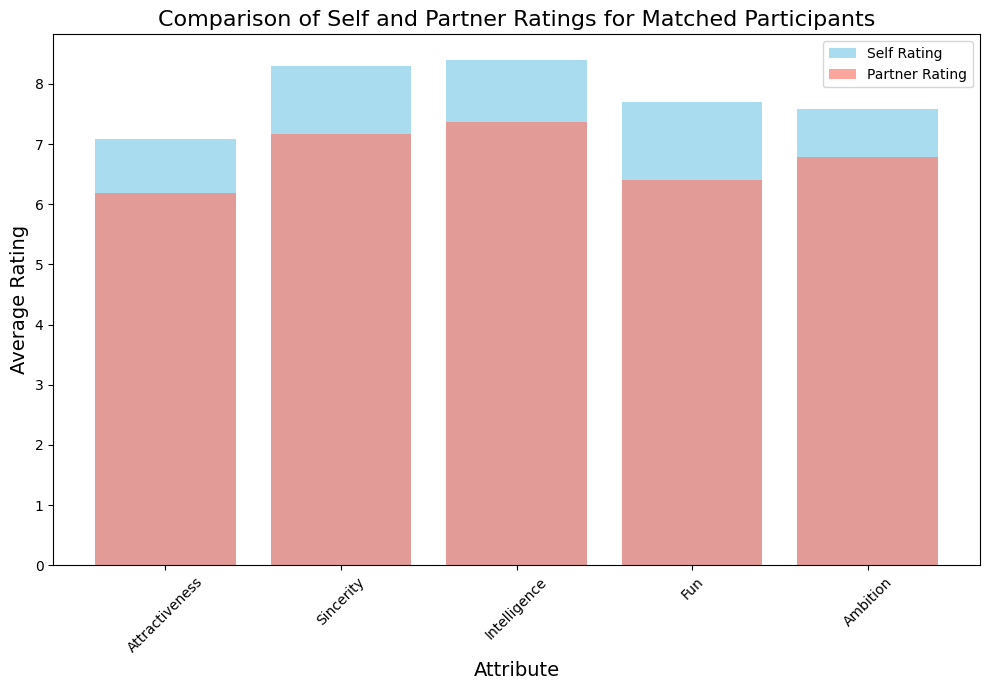

In [ ]:
#Ce que l'on pense de soit et ce que les autres penses de nous

# Moyennes des auto-évaluations pour chaque phase du speed dating
before_event = data[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean().rename(index=attribute_names)

# Moyennes des évaluations reçues par les partenaires pour les participants ayant eu un match
ratings_received = data[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']].mean().rename(index=attribute_names)

comparison_df = pd.DataFrame({'Attribute': before_event.index, 'Self Rating': before_event.values, 'Partner Rating': ratings_received.values})

plt.figure(figsize=(10, 7))

# visualisations
plt.bar(comparison_df['Attribute'], comparison_df['Self Rating'], color='skyblue', alpha=0.7, label='Self Rating')
plt.bar(comparison_df['Attribute'], comparison_df['Partner Rating'], color='salmon', alpha=0.7, label='Partner Rating')

plt.xlabel('Attribute', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Comparison of Self and Partner Ratings for Matched Participants', fontsize=16)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


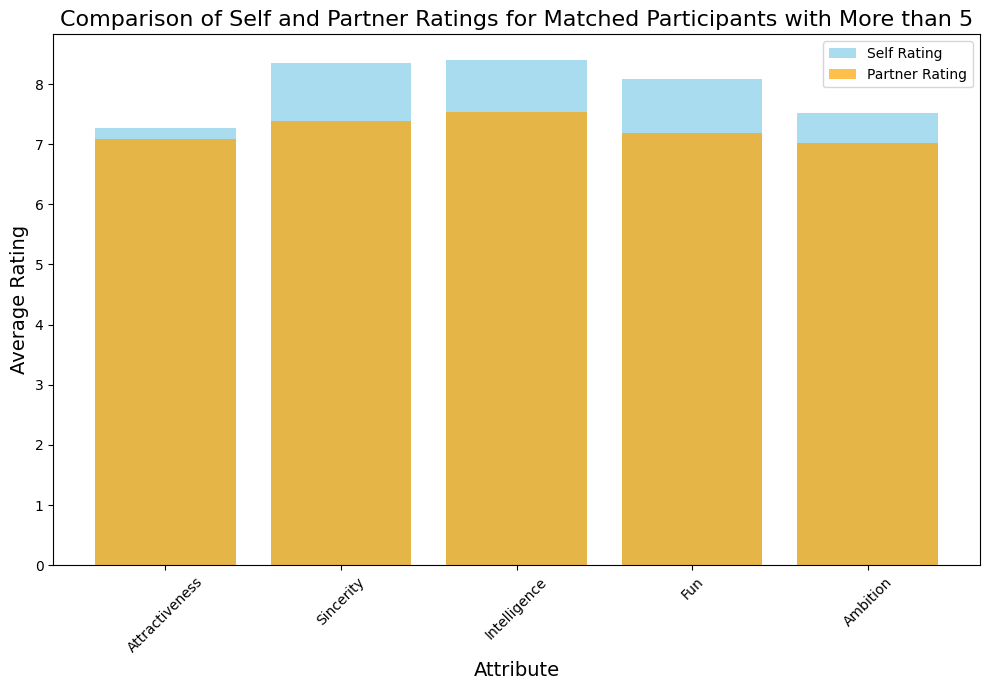

In [ ]:
# Comparaison entre ce que l'on pense de soit / que les autres pense de nous pour ceux avec plus de 5 matches
filtered_data = data[data['more_than_5_matches'] == 1]

# Moyennes des auto-évaluations pour chaque phase du speed dating
before_event = filtered_data[['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']].mean().rename(index=attribute_names)

# Moyennes des évaluations reçues par les partenaires pour les participants ayant eu un match
ratings_received = filtered_data[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']].mean().rename(index=attribute_names)

comparison_df = pd.DataFrame({'Attribute': before_event.index, 'Self Rating': before_event.values, 'Partner Rating': ratings_received.values})

plt.figure(figsize=(10, 7))

# visualisations
plt.bar(comparison_df['Attribute'], comparison_df['Self Rating'], color='skyblue', alpha=0.7, label='Self Rating')
plt.bar(comparison_df['Attribute'], comparison_df['Partner Rating'], color='orange', alpha=0.7, label='Partner Rating')

plt.xlabel('Attribute', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Comparison of Self and Partner Ratings for Matched Participants with More than 5', fontsize=16)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
